<a href="https://colab.research.google.com/github/leandroaguazaco/data_science_portfolio/blob/main/Projects/01-NPS_Analysis/P01_NPS_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> NPS ANALYSIS </h1>

The aim of this project is to analyze and evaluate customer service provided by a company based on historical information and customer service usage. The intended result is to provide a perspective or new viewpoint and offer insights for redesigning the customer experience area.

## a - Download and Install libraries

In [ ]:
!pip install pandas
#!pip install datatable
!pip install polars
!pip install xlsx2csv
!pip install tidypolars
!pip install pyjanitor
!pip install missingno
!pip install pyod # Python library for detecting anomalies in multivariate data.
!pip install prince # Python library for multivariate exploratory data analysis in Python

!pip install -U matplotlib #!pip install matplotlib==3.3
!pip install seaborn
!pip install plotly
!pip install colorama
!pip install adjustText

!pip install -U --pre pycaret #!python -m pip uninstall pycaret
!pip install -U scikit-learn
!pip install xgboost

!pip install -U ydata-profiling

In [ ]:
!pip install adjustText

## b - Import libraries

In [327]:
# Python Utilies
import pandas as pd # other libraries: datatable , polars, tidypolars
import polars as pl
import numpy as np
import warnings
from janitor import clean_names, remove_empty
from colorama import Fore, Style
import math

# Visualization tools
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from adjustText import adjust_text

# Outliers Detection
from pyod.models.ecod import ECOD
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

# EDA and Autometed EDA
import missingno as msno
from ydata_profiling import ProfileReport
import prince # MCA

# Machine learning
import xgboost as xgb
  ## PyCaret
from pycaret.classification import *
from pycaret.regression import *
  ## Sklearn
    ### Imputation
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.experimental import enable_iterative_imputer
    ### Preporcessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
    ### Models
from sklearn.ensemble import ExtraTreesRegressor, RandomForestClassifier
from sklearn.linear_model import BayesianRidge

In [227]:
# Setups

%matplotlib inline
plt.style.use("ggplot") # print(plt.style.available)
# sns.set_style(rc = {'axes.facecolor': 'gray'}) # Background color
# plt.style.use("seaborn-v0_8-colorblind")
pd.options.plotting.backend = "plotly"
pio.templates.default = "ggplot2"
#pio.templates
warnings.simplefilter("ignore")

## c - Load data

In [5]:
# Data set 1
%%time

# To pandas DataFrame format, to clean names, to remove empty columns, set index columnn and drop duplicates.
# Optionals steps under context.

encuesta_indicadores_df  = pl.read_excel(source = "Encuesta_Indicadores.xlsx",
                                         sheet_name = "Sheet1",
                                         xlsx2csv_options = {"skip_empty_lines": True},
                                         read_csv_options ={"has_header": True,
                                                            "try_parse_dates": True, # Important
                                                            "encoding": "utf8"}) \
                            .to_pandas() \
                            .pipe(clean_names) \
                            .pipe(remove_empty) \
                            .set_index("id") \
                            .drop_duplicates()

"""
# Using pandas
encuesta_indicadores_df = pd.read_excel("Encuesta_Indicadores.xlsx",
                                        sheet_name = "Sheet1",
                                        header = 0 ,
                                        index_col = "id")
"""

print(f"{Fore.GREEN} {type(encuesta_indicadores_df)} {Style.RESET_ALL}")
print("\n")
print(f" {Fore.BLUE} DataFrame Encuesta Indicadores: rows = {encuesta_indicadores_df.shape[0]}, columns = {encuesta_indicadores_df.shape[1]} {Style.RESET_ALL}")
print("\n")
print(encuesta_indicadores_df.head().𝚝𝚘_𝚖𝚊𝚛𝚔𝚍𝚘𝚠𝚗())
print("\n")

 <class 'pandas.core.frame.DataFrame'> 


  DataFrame Encuesta Indicadores: rows = 6638, columns = 16 


|   id | fecha_meda          | grupo_meda     |   nps_med | fcr_cat   |   esfuerzo |   satisfaccion_asesor |   satisfaccion_general | tipo_nps    | tipo_ces            | tipo_satu_asesor   | tipo_satu_general   | ticket_status   | problema                    | necesidad              | tipologia                     | id_asesor   |
|-----:|:--------------------|:---------------|----------:|:----------|-----------:|----------------------:|-----------------------:|:------------|:--------------------|:-------------------|:--------------------|:----------------|:----------------------------|:-----------------------|:------------------------------|:------------|
| 3971 | 2021-12-28 00:00:00 | Whatsapp Hogar |         7 | Sí        |          7 |                     8 |                      4 | Neutros     | Ni Fácil ni Difícil | Satisfecho         | Satisfecho          |                 | 

In [7]:
# Data set 2
%%time

# To pandas DataFrame format, to clean names, to remove empty columns, set index columnn and drop duplicates.
# Optionals steps under context.

encuesta_df = pl.read_excel(source = "Encuesta.xlsx",
                            sheet_name = "Sheet1",
                            xlsx2csv_options = {"skip_empty_lines": True},
                            read_csv_options ={"has_header": True,
                                               "try_parse_dates": True, # Important
                                               "encoding": "utf8"}) \
                .to_pandas() \
                .pipe(clean_names) \
                .pipe(remove_empty)  \
                .set_index("id_transaccion") \
                .drop_duplicates()

print(f"{Fore.GREEN} {type(encuesta_df)} {Style.RESET_ALL}")
print("\n")
print(f" {Fore.BLUE} DataFrame Encuesta: rows = {encuesta_df.shape[0]}, columns = {encuesta_df.shape[1]} {Style.RESET_ALL}")
print("\n")
print(encuesta_df.head().to_markdown(tablefmt="grid"))
print("\n")

 <class 'pandas.core.frame.DataFrame'> 


  DataFrame Encuesta: rows = 3719, columns = 2 


+------------------+--------------+------------------------------+
|   id_transaccion | polaridad    | call_center_comentario_ltr   |
+==================+==============+==============================+
|                1 | POSITIVO     | información clara            |
+------------------+--------------+------------------------------+
|                2 | MUY POSITIVO | buena atención y asesoría    |
+------------------+--------------+------------------------------+
|                3 | MUY POSITIVO | buena atencio                |
+------------------+--------------+------------------------------+
|                4 | NEGATIVO     | muy demorado                 |
+------------------+--------------+------------------------------+
|                5 | MUY POSITIVO | buena atención               |
+------------------+--------------+------------------------------+


CPU times: user 217 ms, sys: 4.33 m

## d - Types conversion and reduce memory usage

### d.1 - Function types conversions

In [8]:
# dtypes conversion and memory reduce function.

def dtype_conversion(df: pd.DataFrame = None, verbose: bool = True):
    """
    Summary:
      Function to dtypes conversion and save reduce memory usage; takes a DataFrame as argument, returns DataFrame.
      For more details, visit: https://towardsdatascience.com/how-to-work-with-million-row-datasets-like-a-pro-76fb5c381cdd.
      The modifications include type casting for numerical and object variables.
    Parameters:
      df (pandas.DataFrame): DataFrame containing information.
      verbose (bool, default = True): If true, display results (conversions and warnings)
    Returns:
      pandas.DataFrame: original DataFrame with dtypes conversions
      Plot original dtypes status, variable warning due high cardinality, save memory usage, final dtypes status.
    """
    # 0- Original dtypes
    print(Fore.GREEN + "Input dtypes" + Style.RESET_ALL)
    print(df.dtypes)
    print("\n")
    print(Fore.RED + "High Cardinality: levels > 15" + Style.RESET_ALL)

    # 1- Original memory_usage in MB
    start_mem = df.memory_usage().sum() / 1024 ** 2

    # 2- Numeric Types
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int": # First 3 characters
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max):
                    df[col] = df[col].astype(np.float16)
                elif (c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    # 3- Categorical Types
    categorical = ["object"]
    for col in df.select_dtypes(exclude = ["int8", "int16", "int32", "int64", "float16", "float32", "float64", "datetime64[ns]"]):
        categories = list(df[col].unique())
        cat_len = len(categories)
        if cat_len >= 2 and cat_len < 15:
           df[col] = df[col].astype("category")
        else:
          # Print hight cardinality variables, amount of levels and a sample of 50 firts categories
          print(f"Look at: {Fore.RED + col + Style.RESET_ALL}, {cat_len} levels = {categories[:50]}")

    # 4- Final memory_usage in MB
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print("\n")
        print(f"{Fore.BLUE}Initial memory usage: {start_mem:.2f} MB{Style.RESET_ALL}")
        print(f"{Fore.BLUE}Memory usage decreased to {end_mem:.2f} MB ({ 100 * (start_mem - end_mem) / start_mem:.1f}% reduction){Style.RESET_ALL}")
        print("\n")
        print(Fore.GREEN + "Output dtypes" + Style.RESET_ALL)
        print(df.dtypes)
        print("\n")

### d.2 - Applying type conversion function

In [9]:
# Types conversion Dataset 1: Encuenta Indicadores

%%time
dtype_conversion(encuesta_indicadores_df,
                 verbose = True)

Input dtypes
fecha_meda              datetime64[ns]
grupo_meda                      object
nps_med                          int64
fcr_cat                         object
esfuerzo                         int64
satisfaccion_asesor            float64
satisfaccion_general           float64
tipo_nps                        object
tipo_ces                        object
tipo_satu_asesor                object
tipo_satu_general               object
ticket_status                   object
problema                        object
necesidad                       object
tipologia                       object
id_asesor                       object
dtype: object


High Cardinality: levels > 15
Look at: problema, 22 levels = ['Cancelar servicio', 'Solicitudes y PQRs', 'Reconexiones y suspensiones', 'Dudas de factura', 'Inconformidad con cobros', 'Cobros de servicio adicional', 'Fallas en servicio', 'Detalles y cambio en facturación', 'Servicio soporte técnico', 'Modificaciones en servicio', 'Instalación de

In [10]:
# Types conversion Dataset 2: Encuenta

%%time
dtype_conversion(encuesta_df,
                 verbose = True)

Input dtypes
polaridad                     object
call_center_comentario_ltr    object
dtype: object


High Cardinality: levels > 15
Look at: call_center_comentario_ltr, 3533 levels = ['información clara', 'buena atención y asesoría', 'buena atencio', 'muy demorado', 'buena atención', 'excelente', 'soluciono mi problema', 'buen servicio', 'atención buena', 'por la buena atención', 'excelente servicio', 'no me dieron solucion', 'se me dio la solución que necesitaba', 'el servicio', 'me hicieron esperar más de 30 minutos y no me solucionaron nada', 'buenas noches. me dijieron que en 48 me solucionaban lo de mi factura, y no fue así._x000D_\nsigo con el mismo inconveniente.', 'muy buen servicio', 'no es posible comunicarse con ustedes lo dejan en la linea y no dan respuesta  para algo tan elemental para ustedes como la factura', 'exelente', 'buena', 'atención rápida y satisfactoria', 'excelente atención', 'bien', 'es bueno', 'cuando no hay servicio por fallas no descuentan los días en la 

### d.3 - Final Conversions

In [11]:
# Final conversions

# problema, necesidad and tipología variables do not exhibit cardinality problems
encuesta_indicadores_df = encuesta_indicadores_df.astype({"problema": "category",
                                                          "necesidad": "category",
                                                          "tipologia": "category",
                                                          "id_asesor": "category"})

print(Fore.GREEN + "Final dtypes" + Style.RESET_ALL)
print(encuesta_indicadores_df.dtypes)

Final dtypes
fecha_meda              datetime64[ns]
grupo_meda                    category
nps_med                           int8
fcr_cat                       category
esfuerzo                          int8
satisfaccion_asesor            float16
satisfaccion_general           float16
tipo_nps                      category
tipo_ces                      category
tipo_satu_asesor              category
tipo_satu_general             category
ticket_status                 category
problema                      category
necesidad                     category
tipologia                     category
id_asesor                     category
dtype: object


## e - Exploratory Data Analysis

### e.1 - Automated EDA

In [ ]:
# https://ydata-profiling.ydata.ai/docs/master/pages/getting_started/overview.html

profile = ProfileReport(encuesta_indicadores_df, # DataFrame
                        title = "Exploratory Data Analysis - Encuesta Indicadores Data",
                        # minimal = True,
                        duplicates = None, # Hight memory consume
                        samples = None, # Not necessary
                        correlations ={"auto": {"calculate": False},
                                       "pearson": {"calculate": True}, # For numerical variales
                                       "spearman": {"calculate": True}, # Form nonnormal numerical variable
                                       "kendall": {"calculate": False},
                                       "phi_k": {"calculate": False},
                                       "cramers": {"calculate": True}} # For categorical to categorical variable: Cramer's V association coefficient, numerical to categorical: Cramer’s V association coefficient with the numerical variable discretized automatically.
                      )

In [ ]:
# Notebook widget from Pandas Profiling to visualize EDA, automated eda library.
profile.to_notebook_iframe()

In [ ]:
# Export automated EDA to html file, look up file in current directory
profile.to_file("EDA_Encuesta_Indicadores.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### e.2 - Manual EDA

#### e.2.1 - Python Built Functions

In [22]:
def summary_stats(df: pd.DataFrame = None):
  """
  Summary:
    Use python built functions to summary a DataFrame.
  Parameters:
    df (pandas.DataFrame): DataFrame.
  Return:
    Shows multiple levels of summary statistics.
  """
  # DataFrame Shape
  print(Fore.GREEN + "DataFrame Shape" + Style.RESET_ALL)
  print(f"Rows = {df.shape[0]}, Columns = {df.shape[1]}")
  print("\n")

  # DataFrame Shape Memory usage
  print(Fore.GREEN + "DataFrame Shape Memory usage" + Style.RESET_ALL)
  print(f"Memory usage = {df.memory_usage().sum() / 1024 ** 2:.2f} MB")
  print("\n")

  # General Information
  print(Fore.GREEN + "General Information" + Style.RESET_ALL)
  print(df.info())
  print("\n")

  # Summary Statistics - Datetime Variables
  print(Fore.GREEN + "Summary Statistics - Datetime Variables" + Style.RESET_ALL)
  print(df.describe(include = ["datetime64[ns]"]).T.to_markdown())
  print("\n")

  # Summary Statistics - Numerical Variables
  print(Fore.GREEN + "Summary Statistics - Numerical Variables" + Style.RESET_ALL)
  print(pd.DataFrame(df.describe(include = ["number"]).T) \
          .merge(pd.DataFrame(df.skew(), columns = ["skewness"]), how = "inner", left_index = True, right_index = True) \
          .merge(pd.DataFrame(df.kurtosis(), columns = ["kurtosis"]), how = "inner", left_index = True, right_index = True) \
          .to_markdown())
  print("\n")

  # Summary Statistics - Categorical Variables
  print(Fore.GREEN + "Summary Statistics - Categorical Variables" + Style.RESET_ALL)
  print(df.describe(exclude = ["number", "datetime64[ns]"]).T.to_markdown())
  print("\n")



In [13]:
# Summary statistics
summary_stats(encuesta_indicadores_df)

DataFrame Shape
Rows = 6638, Columns = 16


DataFrame Shape Memory usage
Memory usage = 0.23 MB


General Information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6638 entries, 3971 to 6493
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   fecha_meda            6638 non-null   datetime64[ns]
 1   grupo_meda            6314 non-null   category      
 2   nps_med               6638 non-null   int8          
 3   fcr_cat               6638 non-null   category      
 4   esfuerzo              6638 non-null   int8          
 5   satisfaccion_asesor   6314 non-null   float16       
 6   satisfaccion_general  6562 non-null   float16       
 7   tipo_nps              6638 non-null   category      
 8   tipo_ces              6638 non-null   category      
 9   tipo_satu_asesor      6314 non-null   category      
 10  tipo_satu_general     6562 non-null   category      
 11  ticket_status

#### e.2.2 - Missing values

In [241]:
# 1. Missing vales plot function - Seaborn engine

def missing_plot_seaborn(df):
  """
  Summary:
    Built function to plot missing values and its proportions from a DataFrame, base on seaborrn engine.

  Parameters:
    df (pandas.DataFrame): DataFrame containing information

  Returns:
    Static barplot: proportion of missing values by variable.
    pandas.DataFrame: total and proportion of missing values by variable.
  """
  # Count missing values per variable
  missing_values_df = pd.DataFrame(data = {"dtype": list(df.dtypes),
                                           "missing_values": df.isnull().sum(),
                                          "proportion_missing": round(df.isnull().mean(), 3)}) \
                        .sort_values(by = "missing_values", ascending = False) \
                        .reset_index()

  # Change columns name
  missing_values_df.columns = ["variable", "dtype", "missing_values", "proportion_missing"]
  missing_values_df = missing_values_df.iloc[list(missing_values_df["missing_values"] > 0), :]

  # Plotting missing values
  sns.set_palette(palette = "viridis") # Viridis pallete
  sns.barplot(data = missing_values_df,
              x = "proportion_missing",
              y = "variable",
              orient = "h",
              alpha = 0.85,
              edgecolor = "black")

  plt.title("Missing Values Proportion")
  plt.xlabel("Proportion")
  plt.ylabel("Variable")
  # plt.set_cmap('viridis') # It doesn't work
  plt.show()

  return print(missing_values_df.to_string())

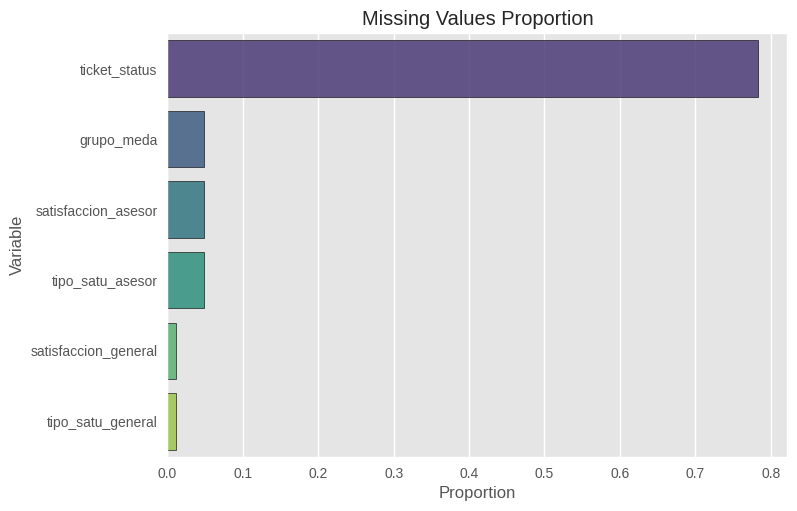

               variable     dtype  missing_values  proportion_missing
0         ticket_status  category            5197               0.783
1            grupo_meda  category             324               0.049
2   satisfaccion_asesor   float16             324               0.049
3      tipo_satu_asesor  category             324               0.049
4  satisfaccion_general   float16              76               0.011
5     tipo_satu_general  category              76               0.011


In [242]:
# Missing values Data set 1:
missing_plot_seaborn(encuesta_indicadores_df)

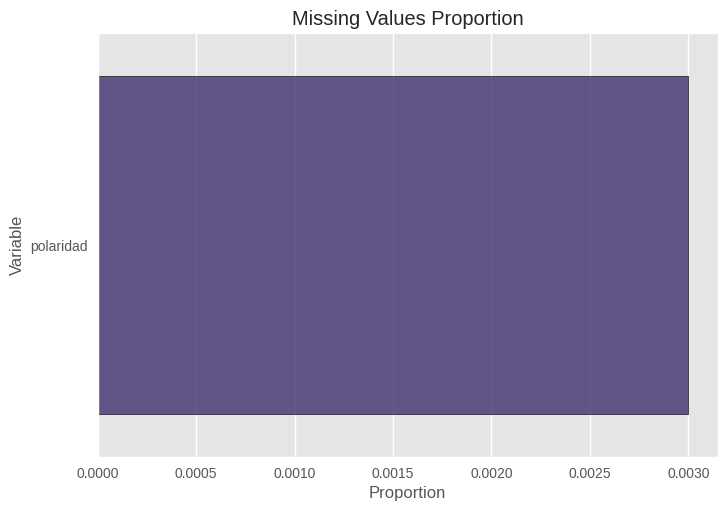

    variable     dtype  missing_values  proportion_missing
0  polaridad  category              13               0.003


In [243]:
# Missing values Data set 2:
missing_plot_seaborn(encuesta_df)

In [17]:
# 1. Missing vales plot function - Plotly engine
def missing_plot_plotly(df):
    """
    Summary:
      Built function to plot missing values and its proportions from a DataFrame, base on plotly engine.

    Parameters:
      df (pandas.DataFrame): DataFrame conteining information

    Returns:
      Interactive barplot: proportion of missing values by variable,
      pandas.Databframe: total and proportion of missing values by variable.
    """
    missing_values_df = pd.DataFrame(data = {"dtype": list(df.dtypes),
                                             "missing_values": df.isnull().sum(),
                                             "proportion_missing": round(df.isnull().mean(), 3)}) \
                          .sort_values(by = "missing_values", ascending = True) \
                          .reset_index()


    # Change columns name
    missing_values_df.columns = ["variable", "dtype", "missing_values", "proportion_missing"]
    missing_values_df = missing_values_df.iloc[list(missing_values_df["missing_values"] > 0), :]

    fig = px.bar(data_frame = missing_values_df,
                y = "variable",
                x = "proportion_missing",
                color_discrete_sequence = px.colors.sequential.Viridis,

                # color = sample(px.colors.sequential.Viridis, missing_values_df.shape[0]),
                # color_discrete_map = "identity",
                # color_discrete_sequence = cm.get_cmap('viridis', 6)
                # color_continuous_scale =  px.colors.sequential.Viridis,
                # text_auto = True,

                orientation = 'h',
                width = 900,
                height = 500)

    fig.update_layout(title = {'text': "Missing Values Proportion",
                              'y': 0.95,
                              'x': 0.5,
                              'xanchor': 'center',
                              'yanchor': 'top'},
                      xaxis_title = "Proportion",
                      yaxis_title = "Variable")

    """
    fig.update_layout(legend_title = "Proportion",
                      showlegend = False)
    """

    fig.update_traces(marker_line_color = 'black')
    fig.show()

    return print(missing_values_df.sort_values(by = "missing_values", ascending = False).to_markdown())

In [ ]:
# Missing values Data set 1:
missing_plot_plotly(encuesta_indicadores_df)

|    | variable             | dtype    |   missing_values |   proportion_missing |
|---:|:---------------------|:---------|-----------------:|---------------------:|
| 15 | ticket_status        | category |             5197 |                0.783 |
| 12 | grupo_meda           | category |              324 |                0.049 |
| 13 | satisfaccion_asesor  | float16  |              324 |                0.049 |
| 14 | tipo_satu_asesor     | category |              324 |                0.049 |
| 10 | satisfaccion_general | float16  |               76 |                0.011 |
| 11 | tipo_satu_general    | category |               76 |                0.011 |


In [ ]:
# Missing values Data set 2:
missing_plot_plotly(encuesta_df)

|    | variable   | dtype    |   missing_values |   proportion_missing |
|---:|:-----------|:---------|-----------------:|---------------------:|
|  1 | polaridad  | category |               13 |                0.003 |


<Axes: >

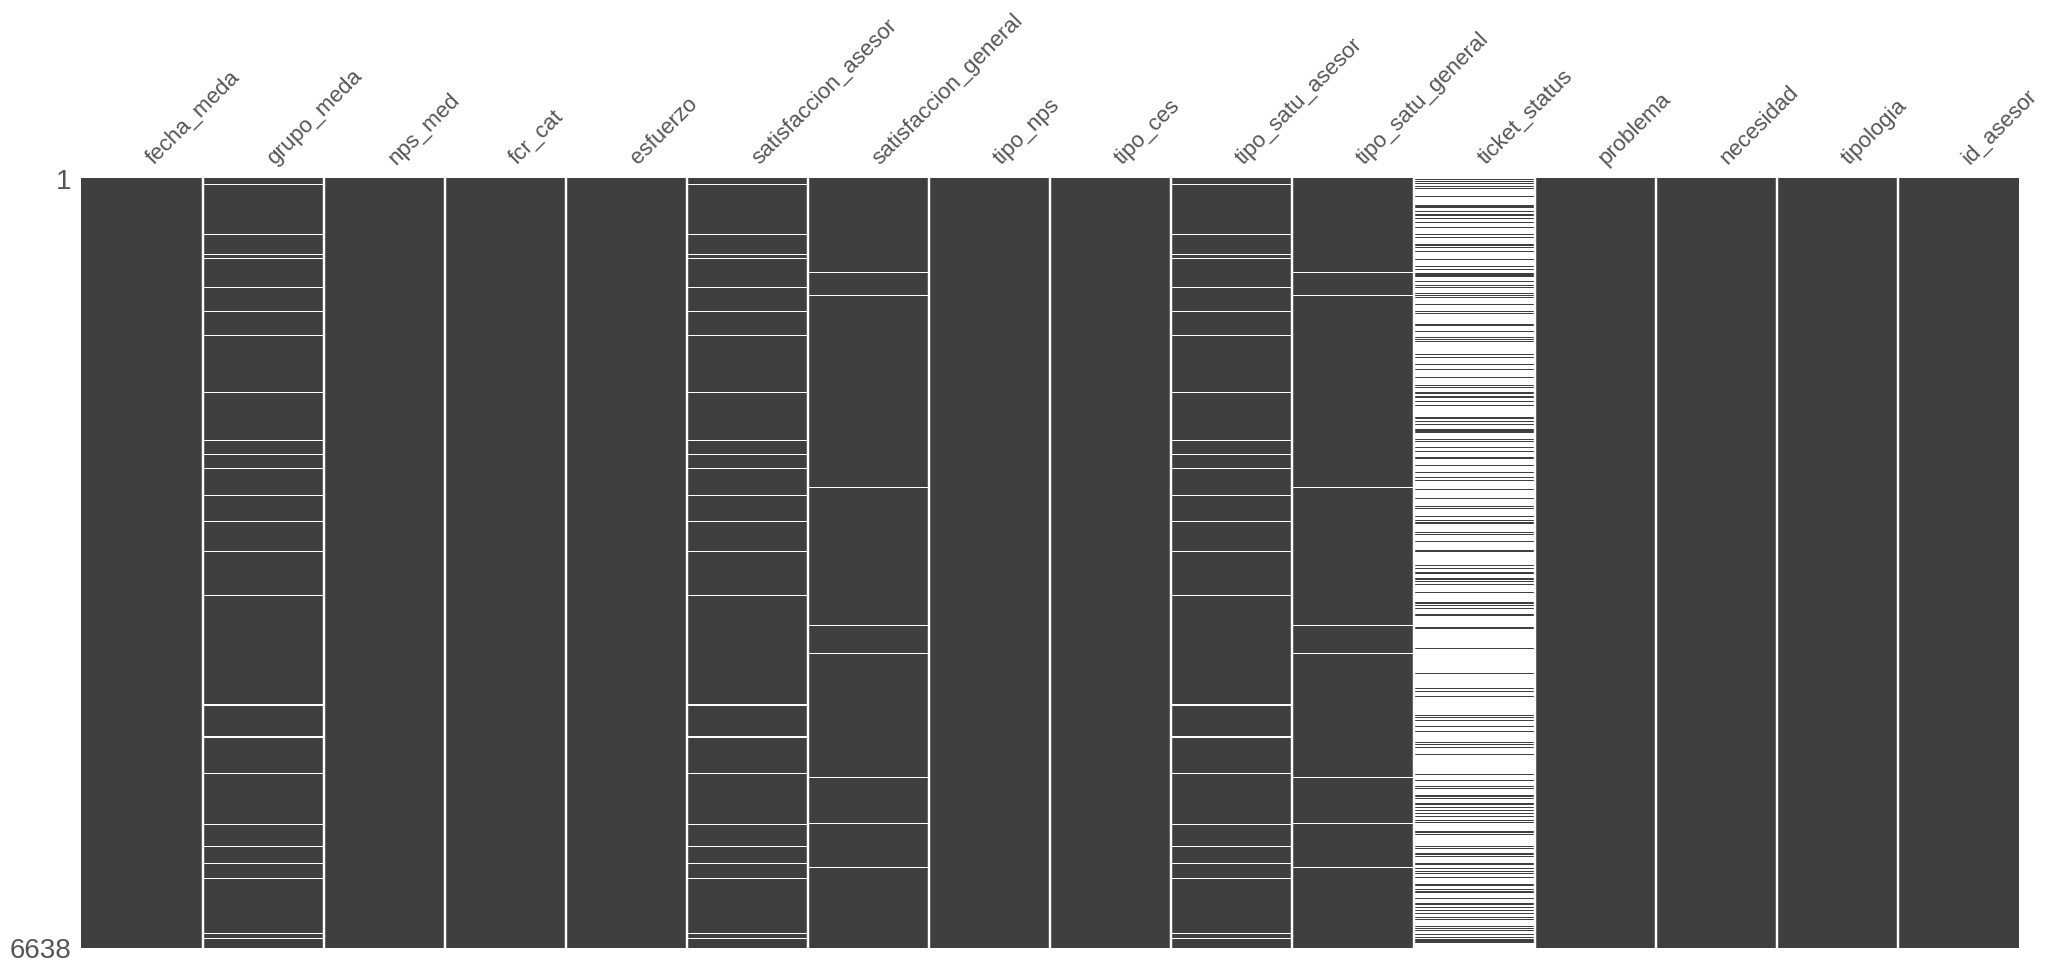

In [18]:
# Pick out patterns in data completion.
msno.matrix(encuesta_indicadores_df,
            sparkline =  False)

At a glance, fecha_meda, nps_med, fcr_cat, esfuerzo, tipo_nps, tipo_ces, problema, tipologia and id_asesor appear to be completely populated, while geographic satisfaccion_general, tipo_status_general seems mostly complete, but spottier.The variable with the higher proportion of missing values is ticket_status (78.3%).

<Axes: >

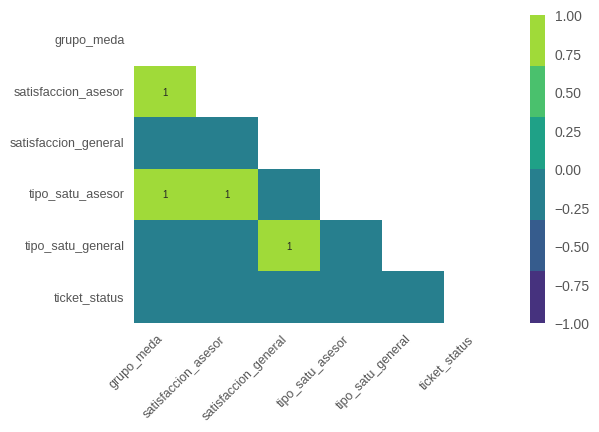

In [19]:
# Missing values correlation heatmap

# Measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.
# Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).
msno.heatmap(encuesta_indicadores_df,
             fontsize = 9,
             cmap = sns.color_palette(palette = "viridis"), # Viridis pallete
             figsize = (6, 4))

<Axes: >

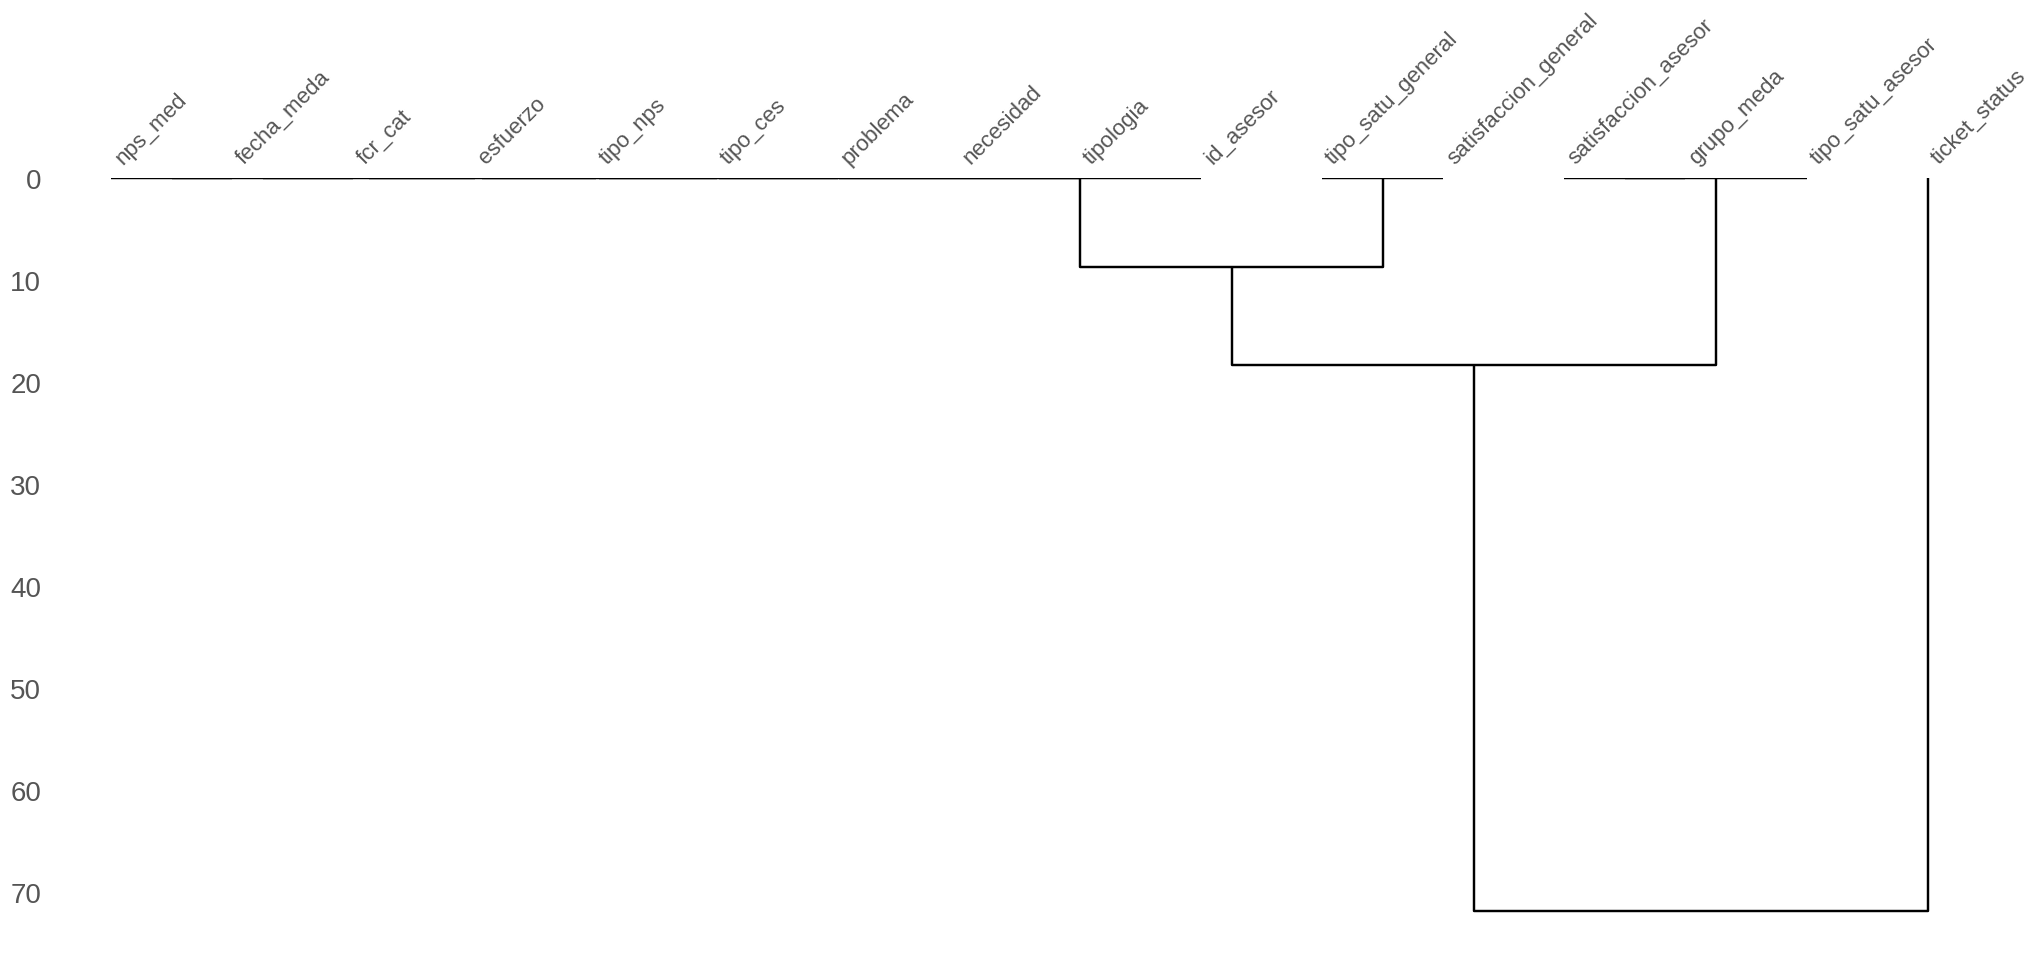

In [20]:
# Dendograma of missing values relations

# Allows a more fully correlate variable completion.
# Using a hierarchical clustering algorithm to bin variables against one another by their nullity correlation.
# More detalis: https://github.com/ResidentMario/missingno
msno.dendrogram(encuesta_indicadores_df)

##### Missing values conclusions

**1 - Missingness types and variables**

* Missing completly at random (**MCAR**): ticket_status.

* Missing at random (**MAR**): none.

* Missing not at random (**MNAR**): <font color='blue'>tipo_satu_general - satisfaccion_general</font> and <font color='green'>satisfaccion_asesor - grupo_meda - tipo_satu_asesor</font>

**2 - Missing values processing**

* Dispense with ticket variable, i.e. delete variable.
* Impute the other variables.


In [23]:
# Isolate and compare missing and complete values aside
# Delete variables: ticket_status

def num_summary_stat(df: pd.DataFrame = None):
  """
  Summary:
    Funcion to compute summary statistics from a DataFrame, include skewness and kurtosis.
  Parameters:
    df (pandas DataFrame, default = None): Dataset.
  Returns:
    Table, in markdown format, that contains summary statistics.
  """
  print(pd.DataFrame(df.describe(include = ["number"]).T) \
          .merge(pd.DataFrame(df.skew(), columns = ["skewness"]), how = "inner", left_index = True, right_index = True) \
          .merge(pd.DataFrame(df.kurtosis(), columns = ["kurtosis"]), how = "inner", left_index = True, right_index = True) \
          .to_markdown())

In [24]:
# Original DataFrame, complete information
complete = encuesta_indicadores_df.drop(["ticket_status"], axis = 1).copy(deep = True)

# DataFrame dropping NAs
no_missing = encuesta_indicadores_df.drop(["ticket_status"], axis = 1).dropna()

# Summary Statistics - Numerical Variables
print(Fore.GREEN + "Original DF vs Without Missing Values DF - Numerical Variables" + Style.RESET_ALL)
num_summary_stat(complete)
print("\n")
num_summary_stat(no_missing)
print("\n")

# Summary Statistics - Categorical Variables
print(Fore.GREEN + "Without Missing Values and Complete - Categorical Variables" + Style.RESET_ALL)
print(complete.describe(exclude = ["number", "datetime64[ns]"]).T.to_string())
print("\n")
print(no_missing.describe(exclude = ["number", "datetime64[ns]"]).T.to_string())

Original DF vs Without Missing Values DF - Numerical Variables
|                      |   count |    mean |     std |   min |   25% |   50% |   75% |   max |   skewness |   kurtosis |
|:---------------------|--------:|--------:|--------:|------:|------:|------:|------:|------:|-----------:|-----------:|
| nps_med              |    6638 | 7.21754 | 3.64666 |     0 |     5 |     9 |    10 |    10 |   -1.10716 |  -0.353297 |
| esfuerzo             |    6638 | 6.97951 | 3.73802 |     0 |     5 |     9 |    10 |    10 |   -0.9623  |  -0.671407 |
| satisfaccion_asesor  |    6314 | 7.32031 | 3.74219 |     0 |     6 |     9 |    10 |    10 |   -1.16113 |  -0.321777 |
| satisfaccion_general |    6562 | 3.89258 | 1.51465 |     1 |     3 |     5 |     5 |     5 |   -1.08594 |  -0.42749  |


|                      |   count |    mean |     std |   min |   25% |   50% |   75% |   max |   skewness |   kurtosis |
|:---------------------|--------:|--------:|--------:|------:|------:|------:|------:|--

##### Impute missing values

* KNN imputer form numerical data.
* Multivariate feature imputation.

In [ ]:
# KNN imputer for numerical data
# complete[complete.isnull()] = np.nan
complete_imputed = encuesta_indicadores_df.drop(["ticket_status"], axis = 1).copy(deep = True)

# k-Nearest Neighbors imputer
knn_imputer = KNNImputer(missing_values = np.nan,
                         n_neighbors = 5,
                         # add_indicator=True
                         weights = 'distance')

# Fit to data, then transform it
complete_imputed[complete_imputed.select_dtypes(include = "number").columns] = knn_imputer.fit_transform(complete_imputed[complete_imputed.select_dtypes(include = "number").columns])

# Compare with summary statictics from the original dataset
print(Fore.GREEN + "Original DF vs KNN Imputed DF - Numerical Variables" + Style.RESET_ALL)
num_summary_stat(complete)
num_summary_stat(complete_imputed)

Original DF vs KNN Imputed DF - Numerical Variables
|                      |   count |    mean |     std |   min |   25% |   50% |   75% |   max |   skewness |   kurtosis |
|:---------------------|--------:|--------:|--------:|------:|------:|------:|------:|------:|-----------:|-----------:|
| nps_med              |    6638 | 7.21754 | 3.64666 |     0 |     5 |     9 |    10 |    10 |   -1.10716 |  -0.353297 |
| esfuerzo             |    6638 | 6.97951 | 3.73802 |     0 |     5 |     9 |    10 |    10 |   -0.9623  |  -0.671407 |
| satisfaccion_asesor  |    6314 | 7.32031 | 3.74219 |     0 |     6 |     9 |    10 |    10 |   -1.16113 |  -0.321777 |
| satisfaccion_general |    6562 | 3.89258 | 1.51465 |     1 |     3 |     5 |     5 |     5 |   -1.08594 |  -0.42749  |
|                      |   count |    mean |     std |   min |   25% |   50% |   75% |   max |   skewness |   kurtosis |
|:---------------------|--------:|--------:|--------:|------:|------:|------:|------:|------:|-------

In [26]:
# Multivariate feature imputation form numerical data
# complete[complete.isnull()] = np.nan
complete_imputed = encuesta_indicadores_df.drop(["ticket_status"], axis = 1).copy(deep = True)

# RandomForest multivariate feature imputer
rf_imputer = IterativeImputer(estimator = RandomForestClassifier(),
                              max_iter = 10,
                              random_state = 123456)

# Fit to data, then transform it
complete_imputed[complete_imputed.select_dtypes(include = "number").columns] = \
  rf_imputer.fit_transform(complete_imputed[complete_imputed.select_dtypes(include = "number").columns])

# Compare with summary statictics from the original dataset
print(Fore.GREEN + "Original DF vs RandomForest Imputed DF - Numerical Variables" + Style.RESET_ALL)
num_summary_stat(complete)
num_summary_stat(complete_imputed)

Original DF vs RandomForest Imputed DF - Numerical Variables
|                      |   count |    mean |     std |   min |   25% |   50% |   75% |   max |   skewness |   kurtosis |
|:---------------------|--------:|--------:|--------:|------:|------:|------:|------:|------:|-----------:|-----------:|
| nps_med              |    6638 | 7.21754 | 3.64666 |     0 |     5 |     9 |    10 |    10 |   -1.10716 |  -0.353297 |
| esfuerzo             |    6638 | 6.97951 | 3.73802 |     0 |     5 |     9 |    10 |    10 |   -0.9623  |  -0.671407 |
| satisfaccion_asesor  |    6314 | 7.32031 | 3.74219 |     0 |     6 |     9 |    10 |    10 |   -1.16113 |  -0.321777 |
| satisfaccion_general |    6562 | 3.89258 | 1.51465 |     1 |     3 |     5 |     5 |     5 |   -1.08594 |  -0.42749  |
|                      |   count |    mean |     std |   min |   25% |   50% |   75% |   max |   skewness |   kurtosis |
|:---------------------|--------:|--------:|--------:|------:|------:|------:|------:|------

#### e.2.3 Numerical Distributions


In [27]:
# Individual histrogram plot
def ind_distrib_plot_seaborn(df: pd.DataFrame = None, var: str = None, cat: str = None):
  """
  Summary:
    Function to plot individual histogram from determined variables inside a DataFrame.
  Parameters:
    df (pandas.DataFrame): data set
    var (string): Variable to plot
    cat (string): Grouping variable
  Returns:
    Histogram figure form individual variable.
  """
  if cat == None:
    kde_aux = True
  else:
    kde_aux = False

  # Figure
  sns.set_palette(palette = "viridis") # Viridis pallete
  fig = sns.histplot(data = df,
                     x = var,
                     hue = cat,
                     stat = "frequency",
                     kde = kde_aux,
                     multiple = "stack",
                     edgecolor = "black")
  # Legend
  if cat == None:
  # Not inserte legend
    pass
  else:
  # Insert legend
    sns.move_legend(fig,
                    "best",
                    fontsize = 'x-small',
                    edgecolor = "gray",
                    # bbox_to_anchor = (.3, 1),
                    # ncol = 3,
                    # title = None,
                    title_fontsize = 'medium',
                    frameon = True)

  plt.show()

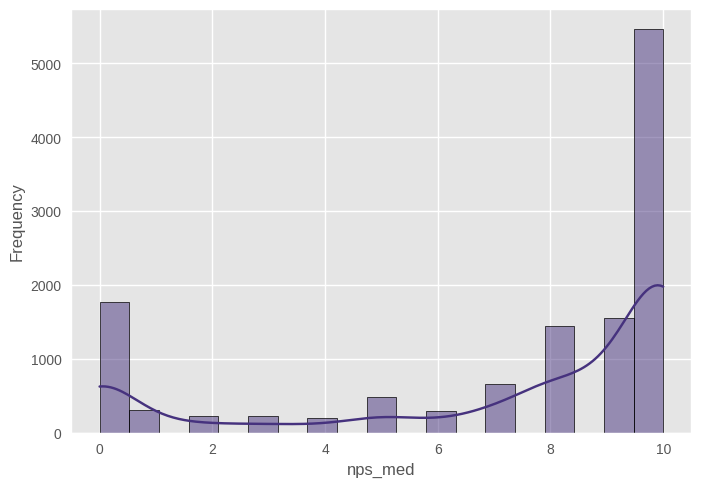

In [387]:
ind_distrib_plot_seaborn(df = encuesta_indicadores_df,
                         var = "nps_med",
                         #cat = "tipo_nps"
)

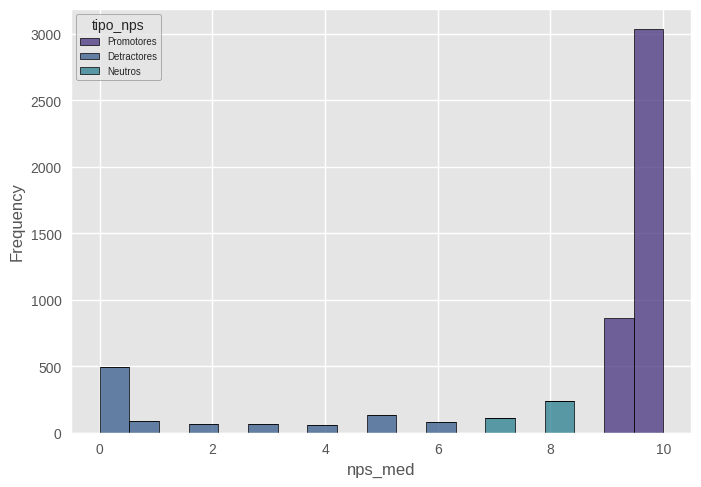

In [388]:
ind_distrib_plot_seaborn(df = encuesta_indicadores_df,
                         var = "nps_med",
                         cat = "tipo_nps"
)

In [30]:
# Grouped histrograms plot
def distrib_plots_seaborn(df: pd.DataFrame = None, cat: str = None):
  """
  Summary:
    Function to create grouped plots of distributions based on histograms, using the seaborn plotting engine.
  Parameters:
    df (pandas.DataFrame): Dataset in pandas format.
    cat (string, default = None): Huening histograms by categorical variable.
  Returns:
    Grouped plots of histograms.
  """

  # 0. Numerical variables
  vars = list(df.select_dtypes(include = "number").columns)
  number_var = len(vars)

  # 1. Number of rows in plot matrix
  rows = math.ceil(number_var / 2)

  # 2. Number of columns in plot matrix, by default 2 columns
  cols = 2

  # 3. Create a figure and a set of subplots
  fig, axs = plt.subplots(nrows = rows,
                          ncols = cols)
  axs = axs.flatten()

  # 4. Group by other variable
  if cat == None:
    kde_aux = True
  else:
    kde_aux = False

  # 5. Create plots
  sns.set_palette(palette = "viridis") # Viridis pallete
  for i, var in enumerate(vars):
    # Figure
    sns.histplot(data = df,
                 x = var,
                 hue = cat,
                 stat = "frequency",
                 ax = axs[i],
                 kde = kde_aux,
                 multiple = "stack",
                 edgecolor = "black")
    axs[i].set_xlabel(var)

    # Legend
    if cat == None:
    # Not insert legend
      pass
    else:
    # Insert legend
      sns.move_legend(axs[i],
                      "best",
                      fontsize = 'x-small',
                      edgecolor = "gray",
                      # bbox_to_anchor = (.3, 1),
                      # ncol = 3,
                      # title = None,
                      title_fontsize = 'medium',
                      frameon = True)

  # fig.suptitle('Distributions of Numerical Variables')
  fig.tight_layout() # To enhance visualization

  plt.show()

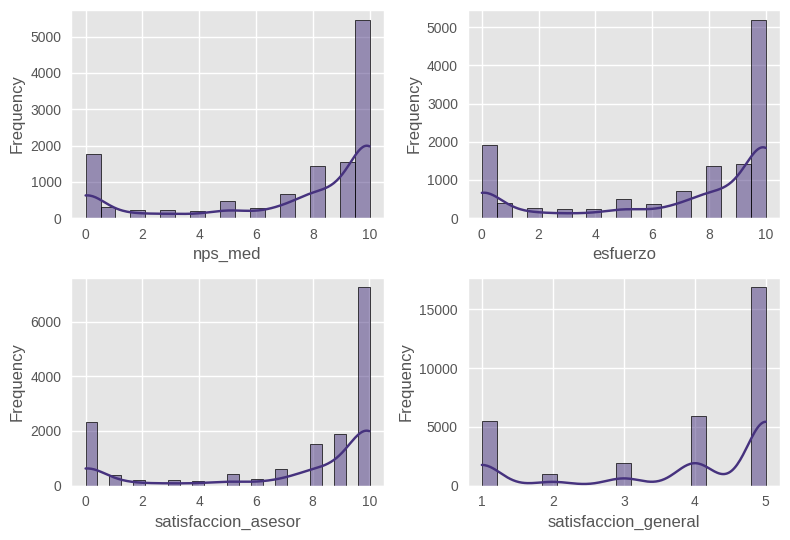

In [389]:
distrib_plots_seaborn(encuesta_indicadores_df,
                      #cat = "tipo_nps"
)

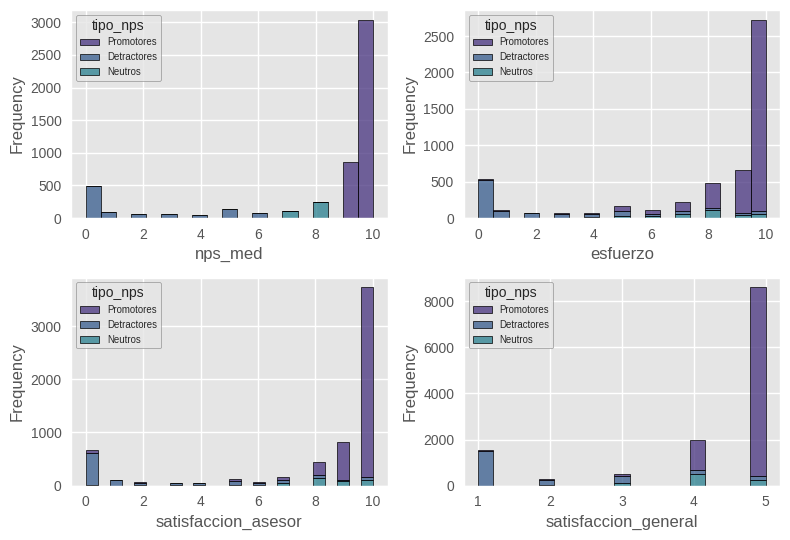

In [390]:
distrib_plots_seaborn(encuesta_indicadores_df,
                      cat = "tipo_nps"
)

#### e.2.4 Categorical Distributions

In [392]:
# Indivudal barplot
def ind_barplot_seaborn(df: pd.DataFrame = None, var: str = None, cat: str = None):
  """
  Summary:
    Function to plot individual countplots from determined variables inside a DataFrame.
  Parameters:
    df (pandas.DataFrame): data set
    var (string): Variable to plot
    cat (string): Grouping variable
  Returns:
    barplot figure
  """
  df[var] = pd.Categorical(df[var], list(df[var].value_counts().index))

  # Figure
  sns.set_palette(palette = "viridis") # Viridis pallete
  fig = sns.histplot(df,
                     x = var,
                     hue = cat,
                     shrink = 0.75,
                     multiple = "stack",
                     # alpha = 0.6,
                     edgecolor = "black")
  # Legend
  if cat == None:
  # Not inserte legend
    pass
  else:
  # Insert legend
    sns.move_legend(fig,
                    "best",
                    fontsize = 'x-small',
                    edgecolor = "gray",
                    # bbox_to_anchor = (.3, 1),
                    # ncol = 3,
                    # title = None,
                    title_fontsize = 'medium',
                    frameon = True)

  plt.show()

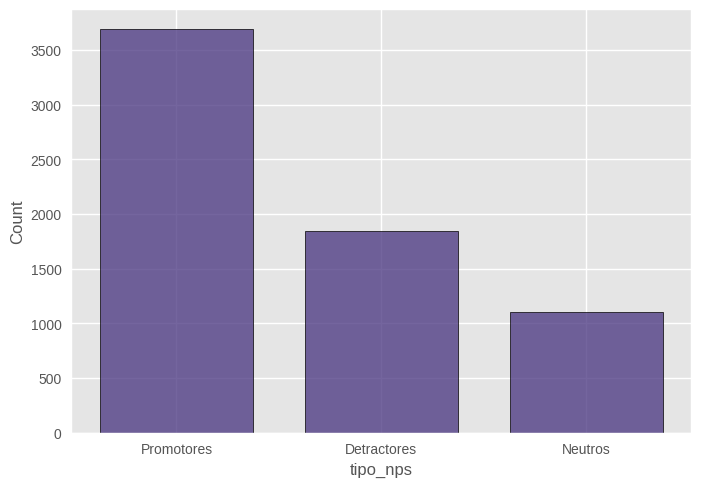

In [393]:
ind_barplot_seaborn(df = encuesta_indicadores_df,
                     var = "tipo_nps",
                     # cat = "tipo_ces"
)

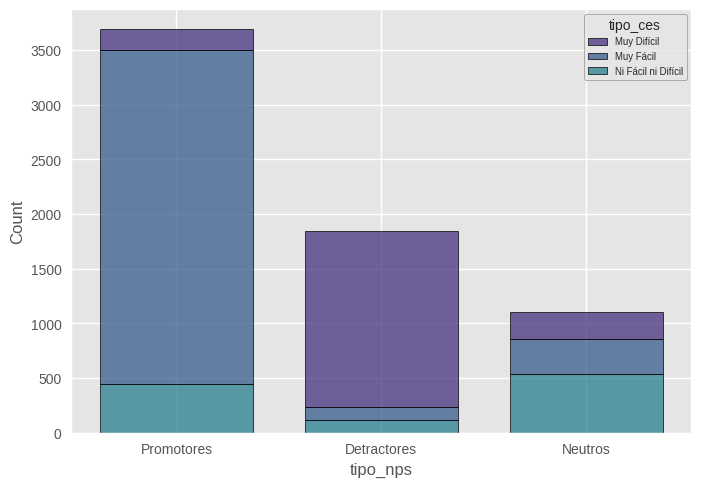

In [394]:
ind_barplot_seaborn(df = encuesta_indicadores_df,
                     var = "tipo_nps",
                     cat = "tipo_ces"
)

In [396]:
def barplots_seaborn(df: pd.DataFrame, cat = None):
  """
  Summary:
    Function to create grouped plots of distributions based on histograms, using the seaborn plotting engine.
  Parameters:
    df (pandas.DataFrame): Dataset in pandas format.
    cat (string, default = None): Huening histograms by categorical variable.
  Returns:
    Grouped plots of histograms.
  """

  # 0. Numerical variables
  vars = list(df.select_dtypes(exclude = ["number", "datetime64[ns]"]).columns)
  numb_var = len(vars)

  # 1. Number of rows in plot matrix
  rows = math.ceil(numb_var / 3)

  # 2. Number of columns in plot matrix, by default 2 columns
  cols = 3

  # 3. Create a figure and a set of subplots
  sns.set_palette(palette = "viridis") # Viridis pallete
  fig, axs = plt.subplots(nrows = rows,
                          ncols = cols,
                          figsize = (12, 25)
                          )
  axs = axs.flatten()

  # 4. Create plots
  for i, var in enumerate(vars):
    # Huer order
    df[var] = pd.Categorical(df[var],
                             list(df[var].value_counts().index))
    # Figure
    sns.histplot(df,
                 x = var,
                 hue = cat,
                 shrink = 0.75,
                 multiple = "stack",
                 ax = axs[i],
                 # alpha = 0.6,
                 # discrete = True,
                 edgecolor = "black")
    # Set x label
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
    # Set y label
    axs[i].set_ylabel("Frequency")
    # Legend
    if cat == None:
    # Not insert legend
      pass
    else:
    # Insert legend
      sns.move_legend(axs[i],
                      "best",
                      fontsize = 'x-small',
                      edgecolor = "gray",
                      # bbox_to_anchor = (.3, 1),
                      # ncol = 3,
                      # title = None,
                      title_fontsize = 'medium',
                      frameon = True)
  # fig.suptitle('Distributions of Numerical Variables')
  fig.tight_layout() # To enhance visualization

  plt.show()

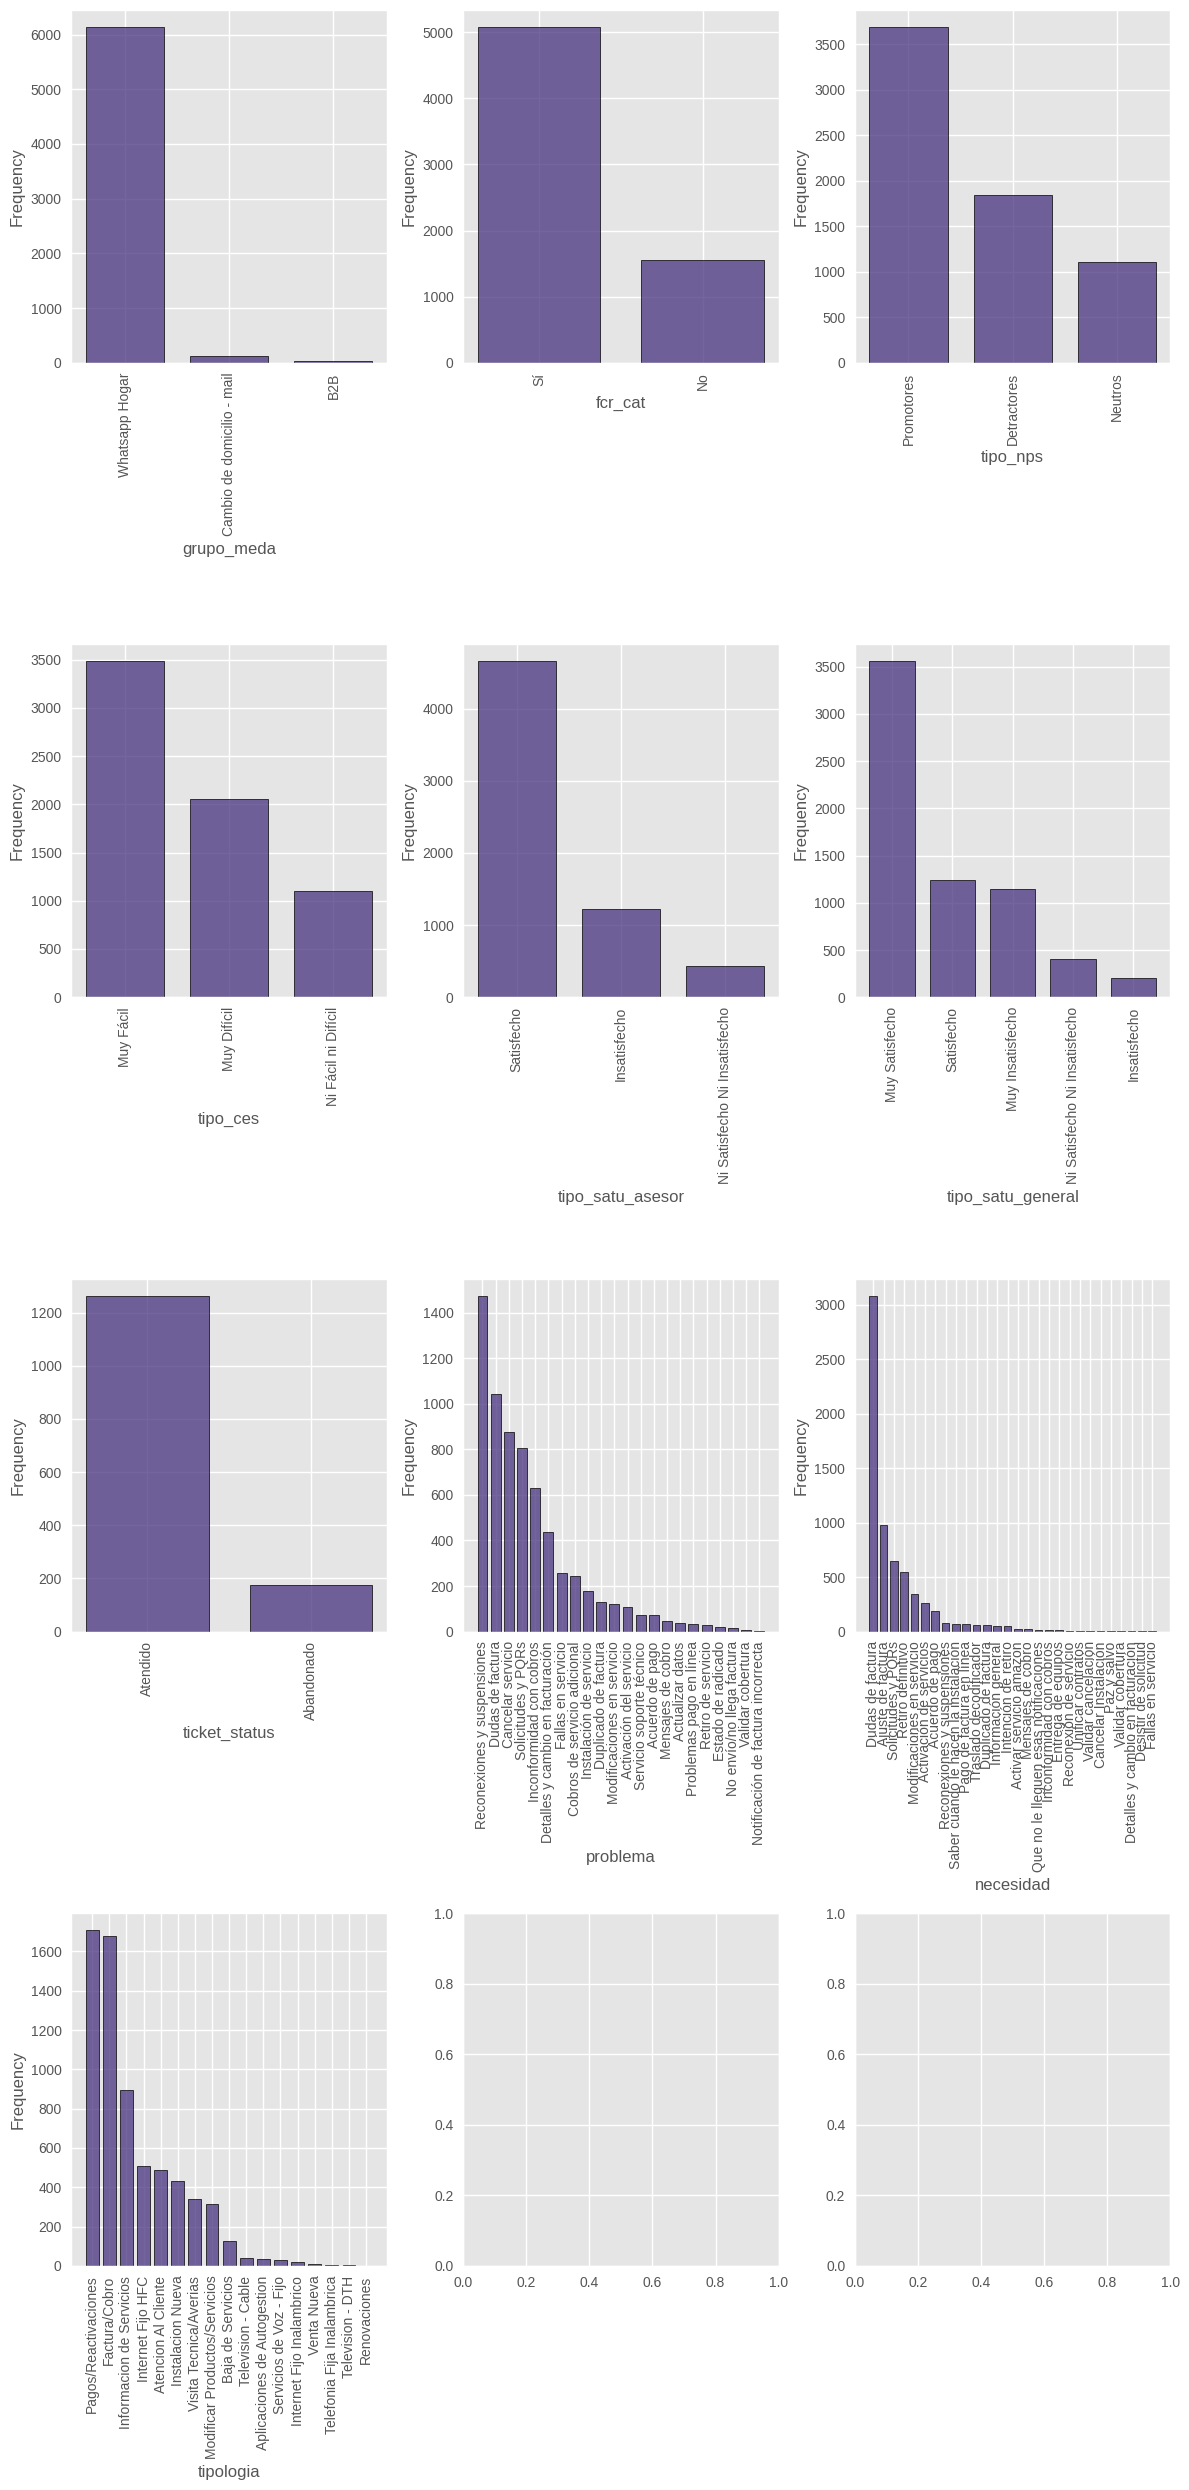

CPU times: user 3.36 s, sys: 285 ms, total: 3.64 s
Wall time: 3.52 s


In [397]:
%%time
barplots_seaborn(encuesta_indicadores_df.drop(["id_asesor"], axis = 1),
                # cat = "tipo_ces"
)

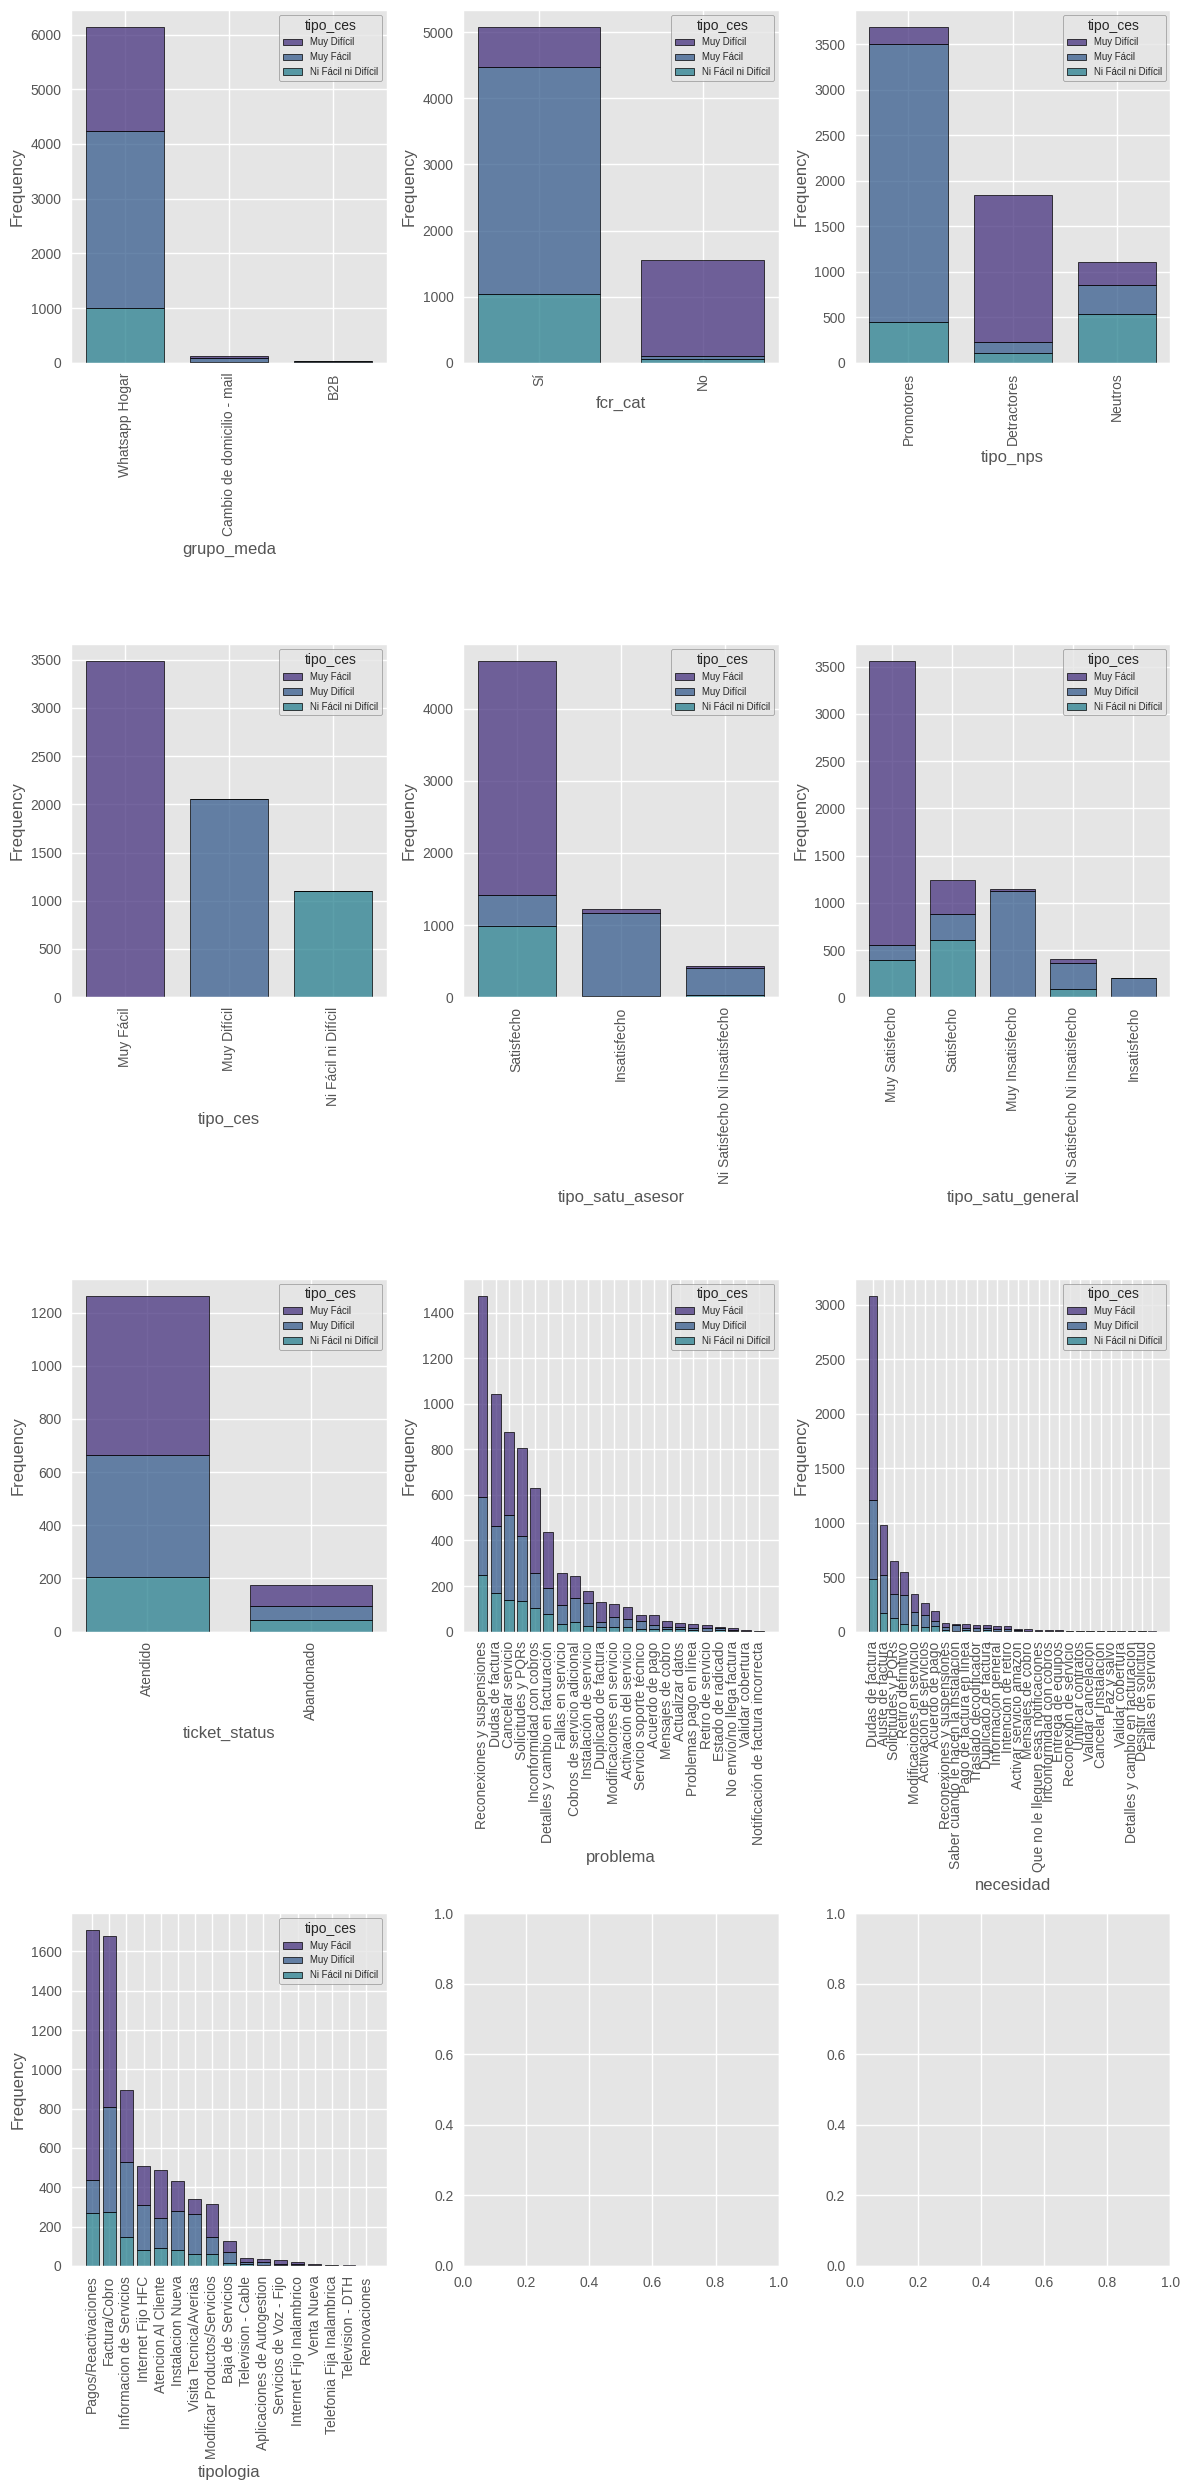

CPU times: user 5.05 s, sys: 177 ms, total: 5.23 s
Wall time: 5.26 s


In [38]:
%%time
barplots_seaborn(encuesta_indicadores_df.drop(["id_asesor"], axis = 1),
                cat = "tipo_ces"
)

#### e.2.5 Outliers Detection

In [398]:
# Individual Boxplots
def ind_boxplot_seaborn(df: pd.DataFrame = None, var: str = None, cat: str = None, hue: str = None):
  """
  Summary:
    Function to plot individual boxplots from determined variables inside a DataFrame.
  Parameters:
    df (pandas.DataFrame): data set
    var (string, default = None): numeric variable to plot, x axis
    cat (string, default = None): vertical variable, y axis
    hue (string, default = None): huening boxplot by categorical variable
  Returns:
    boxplot figure
  """
  # Order
  if cat == None:
    order_aux = None
  else:
    order_aux =list(df.groupby(by = cat, as_index = False)[var] \
                      .median() \
                      .sort_values(by = var, ascending = False) \
                      .set_index(cat) \
                      .index)
  # Figure
  sns.set_palette(palette = "viridis") # Viridis pallete
  fig = sns.boxplot(df,
                     x = var,
                     y = cat,
                     hue = hue,
                     notch = False,
                     order = order_aux,
                     # medianprops={"color": "white"},
                     # hue_order
                     )
  # Legend
  if hue == None or cat == None:
  # Not insert legend
    pass
  else:
  # Insert legend
    sns.move_legend(fig,
                    "best",
                    fontsize = 'x-small',
                    edgecolor = "gray",
                    # bbox_to_anchor = (.3, 1),
                    # ncol = 3,
                    # title = None,
                    title_fontsize = 'medium',
                    frameon = True)

  plt.show()

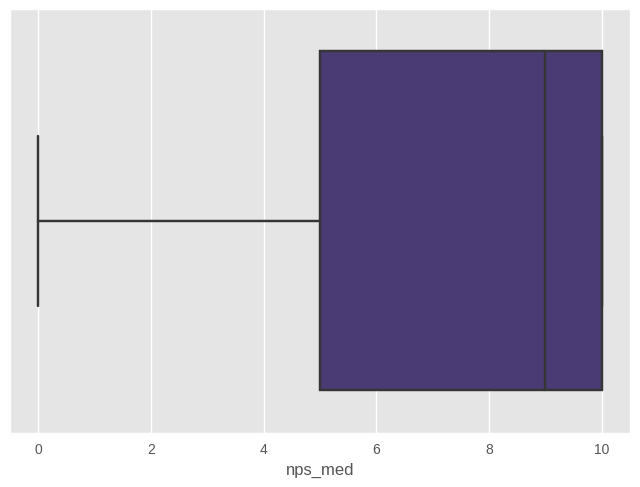

In [247]:
ind_boxplot_seaborn(df = encuesta_indicadores_df,
                    var = "nps_med",
                    #cat = "tipo_ces",
                    #hue = "tipo_nps"
)

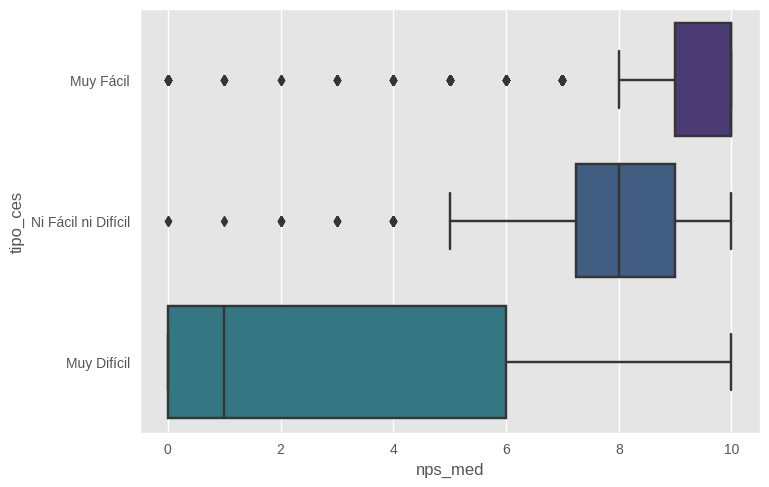

In [399]:
ind_boxplot_seaborn(df = encuesta_indicadores_df,
                    var = "nps_med",
                    cat = "tipo_ces",
                    #hue = "tipo_nps"
)

In [400]:
# Grouped boxplotx
def boxplots_seaborn(df: pd.DataFrame = None, cat: str = None, hue: str = None):
  """
  Summary:
    Function to create grouped boxplots , using the seaborn plotting engine.
  Parameters:
    df (pandas.DataFrame): data set
    cat (string, default = None): vertical variable, y axis
    hue (string, default = None): huening boxplot by categorical variable
  Returns:
    Grouped plots of histograms.
  """

  # 0. Numerical variables
  vars = list(df.select_dtypes(include = "number").columns)
  number_var = len(vars)

  # 1. Number of rows in plot matrix
  rows = math.ceil(number_var / 2)

  # 2. Number of columns in plot matrix, by default 2 columns
  cols = 2

  # 3. Create a figure and a set of subplots
  sns.set_palette(palette = "viridis") # Viridis pallete
  fig, axs = plt.subplots(nrows = rows,
                          ncols = cols)
  axs = axs.flatten()

  # 4. Create plots
  for i, var in enumerate(vars):
    # Order
    if cat == None:
      order_aux = None
    else:
      order_aux =list(df.groupby(by = cat, as_index = False)[var] \
                        .median() \
                        .sort_values(by = var, ascending = False) \
                        .set_index(cat) \
                        .index)
    # Figure
    sns.boxplot(data = df,
                x = var,
                y = cat,
                hue = hue,
                notch = False,
                order = order_aux,
                # medianprops={"color": "white"},
                ax = axs[i],
                # alpha = 0.6,
                # hue_order
                )
    axs[i].set_xlabel(var)

    # Legend
    if hue == None or cat == None:
    # Not insert legend
      pass
    else:
    # Insert legend
      sns.move_legend(axs[i],
                      "best",
                      fontsize = 'x-small',
                      edgecolor = "gray",
                      # bbox_to_anchor = (.3, 1),
                      # ncol = 3,
                      # title = None,
                      title_fontsize = 'medium',
                      frameon = True)

  # fig.suptitle('Distributions of Numerical Variables')
  fig.tight_layout() # To enhance visualization

  plt.show()

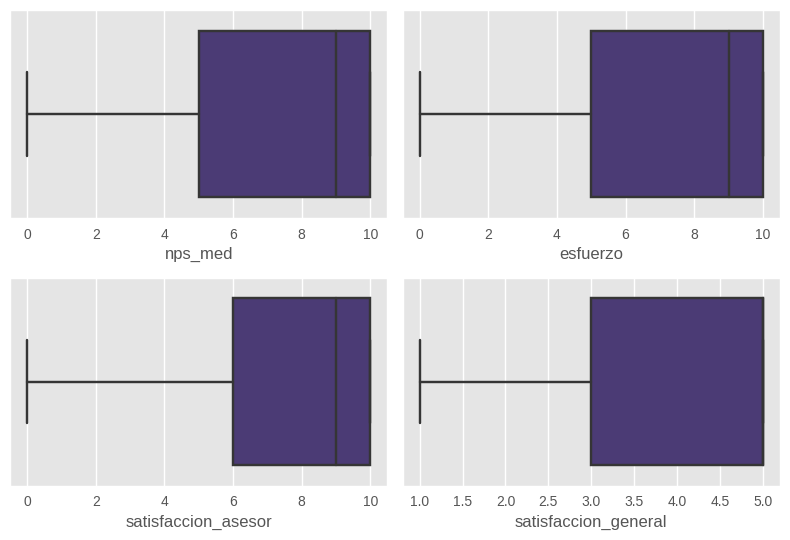

In [401]:
boxplots_seaborn(encuesta_indicadores_df,
                 # cat = "tipo_nps",
                 # hue = "tipo_nps"
)


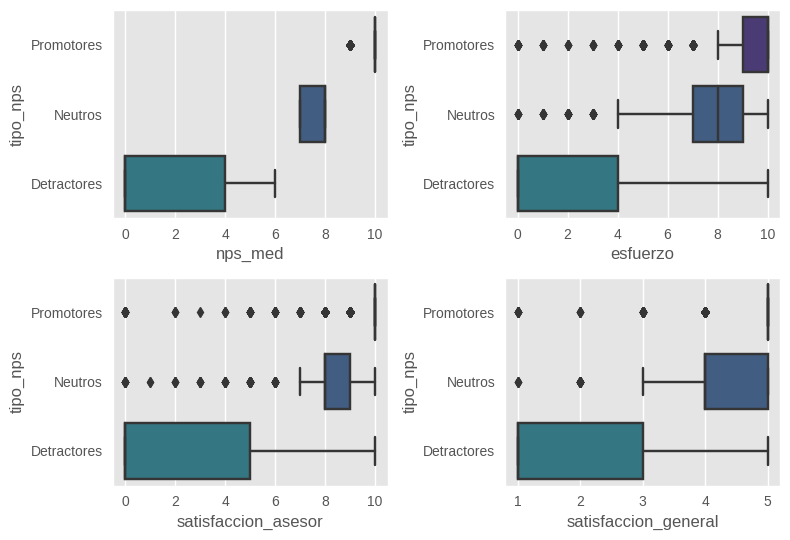

In [402]:
boxplots_seaborn(encuesta_indicadores_df,
                 cat = "tipo_nps",
                 # hue = "tipo_nps"
)

##### Unsupervised Outlier Detection

In [ ]:
# Unsupervised Multivariate Outlier Detection using Empirical Cumulative Distribution Functions (ECOD)

"""
clf_name = 'ECOD'
clf = ECOD()
clf.fit(encuesta_indicadores_df.select_dtypes(include = "number").dropna().to_numpy())
"""

#### e.2.6 Correlation

In [403]:
# Individual Scatterplot
def ind_scatterplot_seaborn(df: pd.DataFrame = None, x = None, y = None, hue: str = None):
  """
  Summary:
    Function to plot individual scatterplots from two numerical and determined variables inside a DataFrame.
  Parameters:
    df (pandas.DataFrame): Dataset.
    x (string): Horizontal variable to plot.
    y (string): Vertical variable to plot.
    hue (string, default = None): Grouping variable.
  Returns:
    Scatterplot figure.
  """
  # Figure
  sns.set_palette(palette = "viridis") # Viridis pallete
  fig = sns.scatterplot(df,
                        x = x,
                        y = y,
                        hue = hue)
  # Legend
  if hue == None:
  # Not inserte legend
    pass
  else:
  # Insert legend
    sns.move_legend(fig,
                    "best",
                    fontsize = 'x-small',
                    edgecolor = "gray",
                    # bbox_to_anchor = (.3, 1),
                    # ncol = 3,
                    # title = None,
                    title_fontsize = 'medium',
                    frameon = True)
    plt.legend(bbox_to_anchor=(1.02, 1),
               loc = 'upper left',
               borderaxespad = 0)

  plt.show()

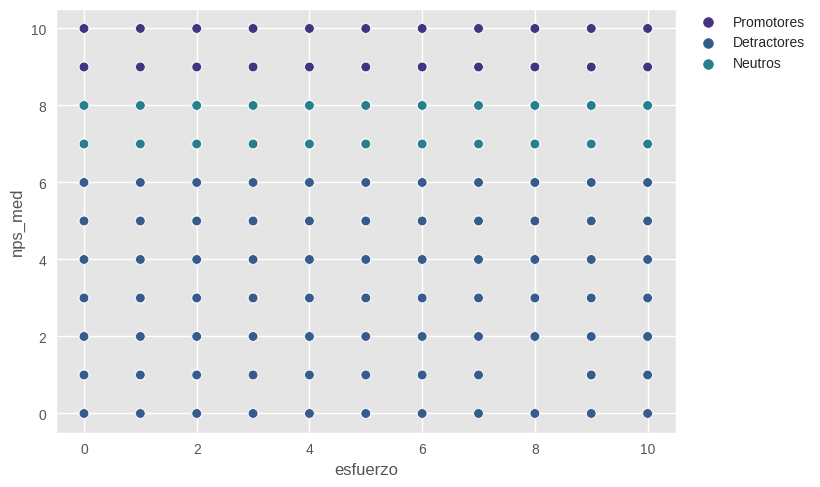

In [404]:
ind_scatterplot_seaborn(df = encuesta_indicadores_df,
                        x = "esfuerzo",
                        y = "nps_med",
                        hue = "tipo_nps"
)

In [405]:
# Correlation Heatmap

def corr_heatmap_seaborn(df: pd.DataFrame = None):
  """
  Summary:
    Function to create correlation matrix using Spearman's rank correlation coefficient and seaborn plotting engine.
  Parameters:
    df (pandas.DataFrame, default = None): Dataset.
  Returns:
   Correlation heatmap.
  """
  sns.set_palette(palette = "viridis") # Viridis pallete
  sns.heatmap(df.select_dtypes(include = ["number"]).corr(method = 'spearman'),
              annot = True,
              cmap = sns.color_palette("viridis", as_cmap = True),
              linewidth = 0.5,
              fmt = ".2f")
  plt.show()

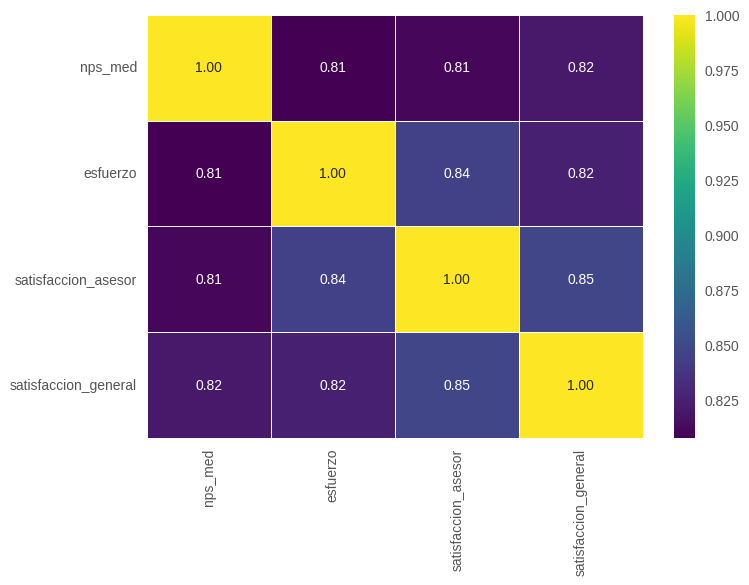

In [406]:
corr_heatmap_seaborn(encuesta_indicadores_df)

In [407]:
# Pairplot - Scatter plots

def pairplot_seaborn(df: pd.DataFrame = None, hue: str = None, kdeplot: bool = False):
  """
    Summary:
      Plot pairwise relationships betwenn numerical variables in a dataset. Seaborn plotting engine.
    Parameters:
      df (pandas.DataFrame, default = None): Dataset
      hue (string, default = None): Huening scatter plost and histograms by categorical variable.
      kdeplot (bool, default = False): kernel density estimate (KDE) plot for visualizing the distribution.
    Returns_
      Pairplot figure.
  """
  sns.set_palette(palette = "viridis") # Viridis pallete
  fig = sns.pairplot(df,
                     hue = hue,
                     corner = True,
                     # diag_kind = "hist",
                     kind = "scatter")
  if kdeplot == True:
    fig.map_lower(sns.kdeplot,
                  levels = 4,
                  color = ".2")
  else:
    pass

  plt.show()

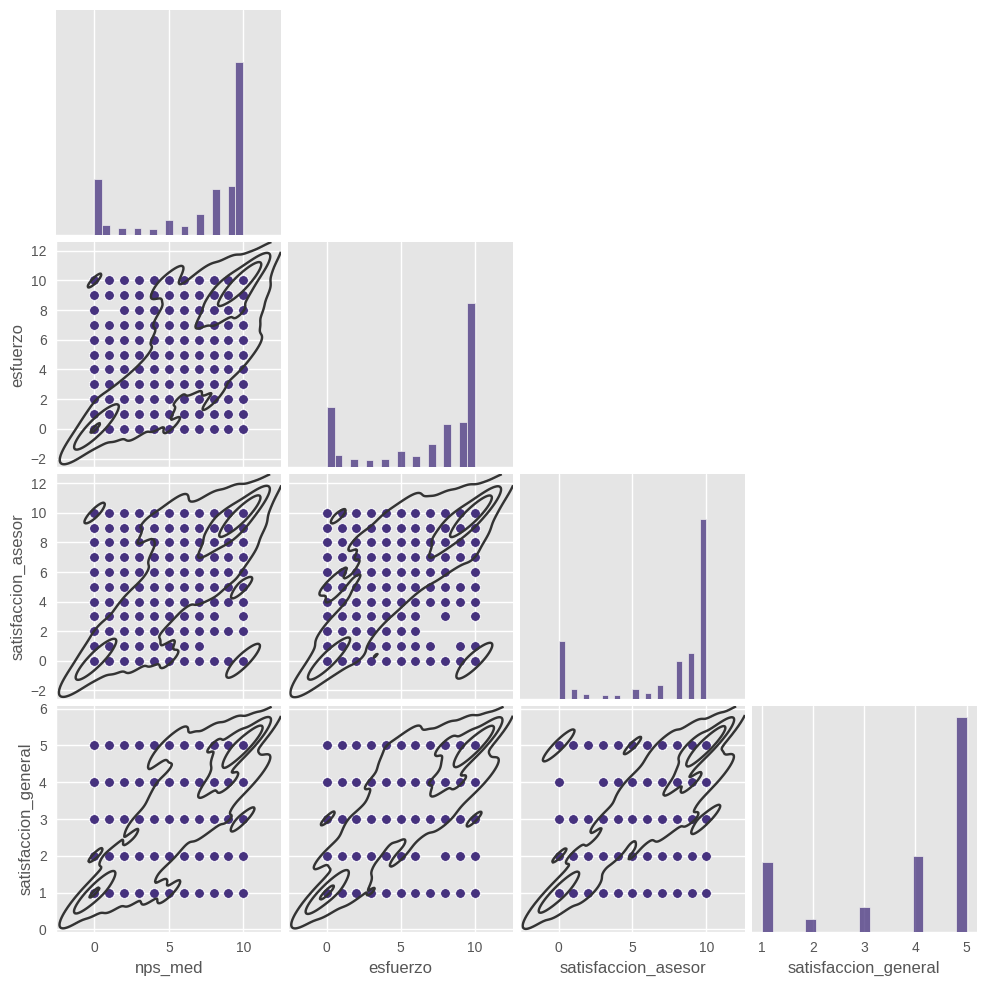

In [410]:
pairplot_seaborn(encuesta_indicadores_df,
                 # hue = "tipo_nps",
                 kdeplot = True
)

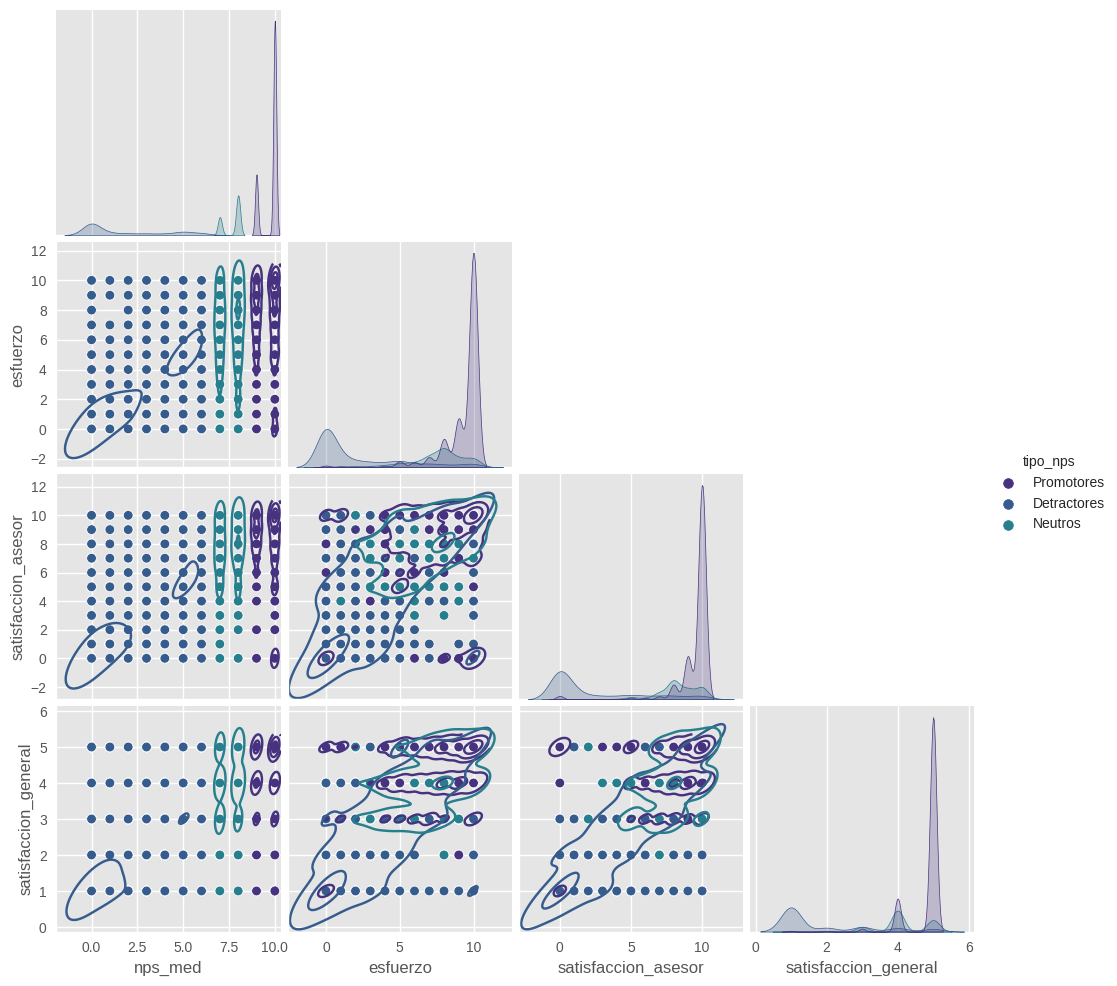

In [408]:
pairplot_seaborn(encuesta_indicadores_df,
                 hue = "tipo_nps",
                 kdeplot = True
)

#### e.2.7 Multiple Correspondence Analysis

In [411]:
# Categorical variables:
def categorical_eda(df: pd.DataFrame = None, levels: int = 10):
  """
  Summary:
    Function to select categorical variables with n or fewer levels. Create a list of variables to perform MCA.
  Parameters:
    df (pandas.DataFrame): Dataset.
    levels (int, default = 10): Number of components in MCA.
  Returns:
    Categories per variable and list that contains categorical variables with n o fewer levels.
  """

  # Important note
  print(Fore.BLUE + "MCA is used to analyze a set of observations described by a set of nominal variables." + Style.RESET_ALL)
  print("\n")

  # 0. Categorical variables, not numerical o datetime
  cat_vars = list(df.select_dtypes(exclude = ["number", "datetime64[ns]"]).columns)

  # 1. Variables to perform multiple correspondence analysis
  global vars_mca
  vars_mca = []

  # 2. Count levels per categorical variable
  for col in cat_vars:
    categories = list(df[col].dropna().unique())
    cat_len = len(categories)

    if cat_len <= 10:
      vars_mca.append(col)
    else:
      pass

    print(f"{Fore.GREEN + col + Style.RESET_ALL}, levels = {Fore.BLUE} {cat_len} {Style.RESET_ALL}, {categories[:30]}")

  print("\n")
  print(Fore.BLUE + "Variables to performance MCA: " + Style.RESET_ALL, vars_mca)

In [412]:
categorical_eda(encuesta_indicadores_df.drop(["ticket_status"], axis = 1))

MCA is used to analyze a set of observations described by a set of nominal variables.


grupo_meda, levels =  3 , ['Whatsapp Hogar', 'Cambio de domicilio - mail', 'B2B']
fcr_cat, levels =  2 , ['Sí', 'No']
tipo_nps, levels =  3 , ['Neutros', 'Promotores', 'Detractores']
tipo_ces, levels =  3 , ['Ni Fácil ni Difícil', 'Muy Difícil', 'Muy Fácil']
tipo_satu_asesor, levels =  3 , ['Satisfecho', 'Insatisfecho', 'Ni Satisfecho Ni Insatisfecho']
tipo_satu_general, levels =  5 , ['Satisfecho', 'Muy Satisfecho', 'Muy Insatisfecho', 'Ni Satisfecho Ni Insatisfecho', 'Insatisfecho']
problema, levels =  22 , ['Cancelar servicio', 'Solicitudes y PQRs', 'Reconexiones y suspensiones', 'Dudas de factura', 'Inconformidad con cobros', 'Cobros de servicio adicional', 'Fallas en servicio', 'Detalles y cambio en facturación', 'Servicio soporte técnico', 'Modificaciones en servicio', 'Instalación de servicio', 'Actualizar datos', 'Activación del servicio', 'Duplicado de factura', 'Retiro de servicio', 'Acuer

In [413]:
# Multiple correspondence analysis - Scree plot
def scree_plot_mca(df: pd.DataFrame = None):
  """
  Summary:
  Parameters:
  Returns:
  """
  df = df[vars_mca].dropna() # DataFrame without NAs

  # 0. MCA object
  mca = prince.MCA(n_components = 10,
                   n_iter = 3,
                   copy = True,
                   check_input = True,
                   engine ='sklearn',
                   random_state = 123456)

  # 1. Fit MCA objetc
  mca = mca.fit(df)

  # -------------------------------------------------------------------------------------------------------------------
  # 2. Tranform results from mca to plot with seaborn
  df = mca.eigenvalues_summary
  df.reset_index(inplace = True)
  df.iloc[:, 2] = df.iloc[:, 2].str.strip("%").astype("float")
  df.iloc[:, 3] = df.iloc[:, 3].str.strip("%").astype("float")
  print(df.to_markdown())
  print("\n")

  # -------------------------------------------------------------------------------------------------------------------
  # 3. MCA Scree plot - Explained Variance

  # 3.1 Plot barplot on axis 1
  sns.set_palette(palette = "viridis") # Viridis pallete
  plt.figure(1)
  ax1 = sns.barplot(data = df,
                    x = "component",
                    y = '% of variance',
                    palette = sns.color_palette(palette = "viridis"))

  ax1.set_xlabel('Component')
  ax1.set_ylabel('% of variance')
  # ax1.set_ylim(0, 40)

  # 3.2 Set up the 2nd axis
  ax2 = ax1.twinx()

  # 3.3 Line plot chart on axis 2
  sns.lineplot(data = df,
              x = "component",
              y = '% of variance (cumulative)',
              sort = False,
              markers = True,
              marker = 'o',
              markersize = 4,
              linewidth = 1.5,
              color = "gray",
              ax = ax2)     # Pre-existing axes for the plot

  # 3.4 Legend, axis labels and grid
  ax2.grid(False) # Turn off grid #2
  ax2.legend(['% of variance (cumulative)'], loc = "center right")
  ax2.set_ylabel('% of variance (cumulative)')
  ax2.set_ylim(0, 100)
  ax2.set_title("MCA Scree plot - Explained Variance")

  plt.show()

|    |   component |   eigenvalue |   % of variance |   % of variance (cumulative) |
|---:|------------:|-------------:|----------------:|-----------------------------:|
|  0 |           0 |        0.708 |           32.7  |                        32.7  |
|  1 |           1 |        0.325 |           14.98 |                        47.68 |
|  2 |           2 |        0.241 |           11.1  |                        58.78 |
|  3 |           3 |        0.169 |            7.81 |                        66.59 |
|  4 |           4 |        0.167 |            7.69 |                        74.28 |
|  5 |           5 |        0.164 |            7.58 |                        81.86 |
|  6 |           6 |        0.106 |            4.9  |                        86.75 |
|  7 |           7 |        0.101 |            4.68 |                        91.43 |
|  8 |           8 |        0.074 |            3.42 |                        94.85 |
|  9 |           9 |        0.038 |            1.76 |            

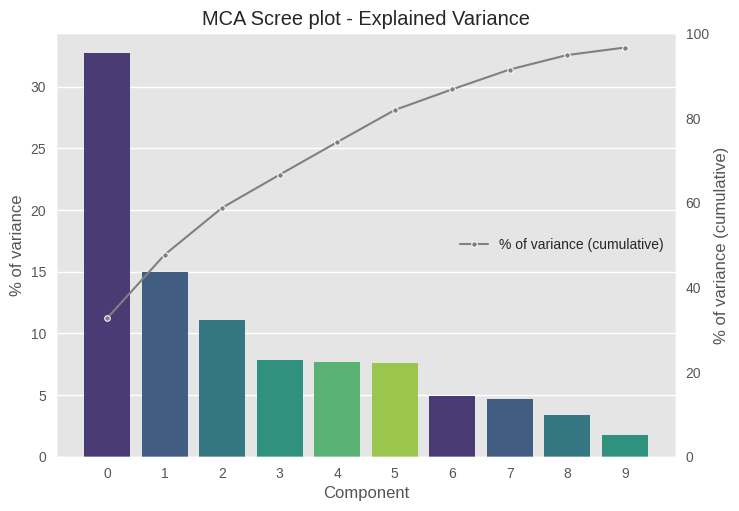

In [414]:
scree_plot_mca(encuesta_indicadores_df.drop(["ticket_status"], axis = 1))

In [415]:
# Multiple correspondence analysis - Biplot
def biplot_mca(df: pd.DataFrame = None):
  """
  Summary:
  Parameters:
  Returns:
  """

  df = df[vars_mca].dropna() # DataFrame without NAs

  # 0. MCA object
  mca = prince.MCA(n_components = 10,
                    n_iter = 3,
                    copy = True,
                    check_input = True,
                    engine ='sklearn',
                    random_state = 123456)

  # 1. Fit MCA objetc
  mca = mca.fit(df)

  # 2. Biplot

  # 2.1 Tranform results from mca to create biplot with seaborn
  df2 = mca.column_coordinates(encuesta_indicadores_df[vars_mca].dropna())
  df2.reset_index(inplace = True)
  df2["variable"] = df2.iloc[:, 0].map(lambda x: x[0: x.rfind("_")])
  df2["level"] = df2.iloc[:, 0].map(lambda x: x[x.rfind("_") + 1: ])

  # 2.2 Scatterplot
  sns.set_palette(palette = "viridis") # Viridis pallete
  mca_fig  = sns.scatterplot(data = df2,
                            x = df2.iloc[:, 1], # Component 1
                            y = df2.iloc[:, 2], # Component 2
                            hue = "variable",
                            # palette = sns.color_palette(palette = "viridis")
                            )

  # 2.3 Add title and labels
  mca_fig.set(title ='MCA - Biplot',
              xlabel = f"Component 0 ({df.iat[0, 2]}%)", # Explained variance by component 1
              ylabel = f"Component 1 ({df.iat[1, 2]}%)") # Explained variance by component 2

  # 2.4 Legend position outside principal frame
  sns.move_legend(mca_fig,
                  "best",
                  fontsize = 'x-small',
                  edgecolor = "gray",
                  # bbox_to_anchor = (.3, 1),
                  # ncol = 3,
                  # title = None,
                  title_fontsize = 'medium',
                  frameon = True)

  plt.legend(bbox_to_anchor = (1.02, 1),
            loc = 'upper left',
            borderaxespad = 0)

  # 2.5 Add label in Biplot
  texts = [plt.text(df2.iloc[i, 1],  df2.iloc[i, 2], df2.iloc[i, 12], ha='center', va='center') for i in range(len(list(df2.iloc[:, 12])))]
  adjust_text(texts)

  plt.show()

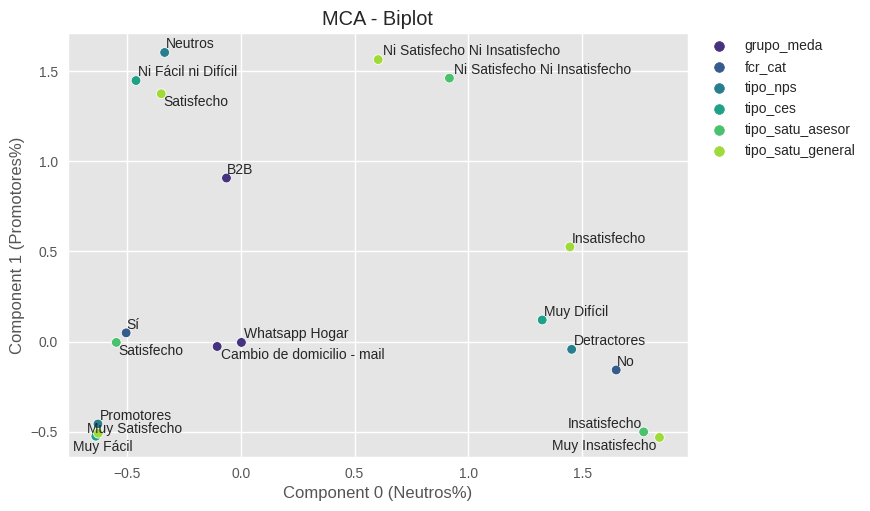

In [416]:
biplot_mca(encuesta_indicadores_df.drop(["ticket_status"], axis = 1))

## Punto 1


Entender el contacto del cliente. Realice un análisis descriptivo detallado de las variables, tenga en cuenta realizar análisis de correlación y pruebas de hipótesis si considera necesario.

En la base de datos *Encuenta_Indicadores" se presentan 6640 registros y 17 campos, 5 variables numéricas, una variable de fecha, 9 variables categóricas y campos de identificadores únicos.

Se denota los siguientes puntos:
* El 50% de clientes otorgaron a los servicios un NPS de 9.
* El 50% de clientes denotaron un esfuerzo de 9, lo cual es un indicar desfavorble para la compañía. el indicador posee una esfuerzo medio de 7.


Se denota como la compañía presenta una mayor cantidad de promotores, por su parte el tipo de esfuerzo *Tipo_CES* con mayor participación es el _Muy Fácil_. Aproximadamente el 50% de clientes han sido calificados como __Satisfecho__ con su asesor, el estatus general predominancia es el __Muy Satisfecho__.

Se observa como todas las variables cuentan con una correlación positiva fuerte. Lo anterior indica que el modificar cualquier variable implica la modificación de las demás.

## Punto 2

(10%) ¿Qué tiene para decir sobre el desempeño de los asesores, ¿cuáles son los mejores y por qué?

En terminos generales, la satisfaccción de los clientes con su asesor es sobresaliente, un total de de 4662 (70%) clientes quedaron safisfechos con el servicio que se les brindó.

In [ ]:
# En terminos generales, acontinuación se presenta el ranking de los 10 mejores asesores con base en la cantidad de clientes que calificaron su servicio como Satisfactorio, respecto al total de servicios realizados
encuesta_indicadores_df[encuesta_indicadores_df["Tipo_SATU_asesor"] == "Satisfecho"].groupby("id_asesor")["Tipo_SATU_asesor"].value_counts().sort_values(ascending = False).head(10)


id_asesor   Tipo_SATU_asesor
Asesor_13   Satisfecho          118
Asesor_204  Satisfecho          108
Asesor_170  Satisfecho          100
Asesor_17   Satisfecho           99
Asesor_10   Satisfecho           96
Asesor_22   Satisfecho           94
Asesor_121  Satisfecho           78
Asesor_77   Satisfecho           76
Asesor_135  Satisfecho           76
Asesor_49   Satisfecho           75
Name: Tipo_SATU_asesor, dtype: int64

## Punto 3


(30%) Utilizando al menos dos modelos supervisados, prediga la variable Tipo_NPS que se encuentra en la base de datos Encuesta_Indicadores.

In [ ]:
# Con el fin de seleccionar los modelos que se ajusten a los datos, se emplea la librería PyCaret

s = setup(data = encuesta_indicadores_df,
          target = 'Tipo_NPS',
          #imputation_type = 'iterative',
          remove_outliers = True,
          remove_multicollinearity = True,
          #numeric_imputation = 'median',
          #feature_selection = True,
          #feature_selection_threshold = 0.8,
          #feature_selection_method = 'classic',
          normalize = True)

In [ ]:
# Comparación de modelos
best = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Los resultados anteriores demuestran que modelos de emsamble se ajustan al conjunto de datos, con lo anterior se seleccionan los modelos de Arbol de decision y XGBoost.

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=1974, splitter='best')


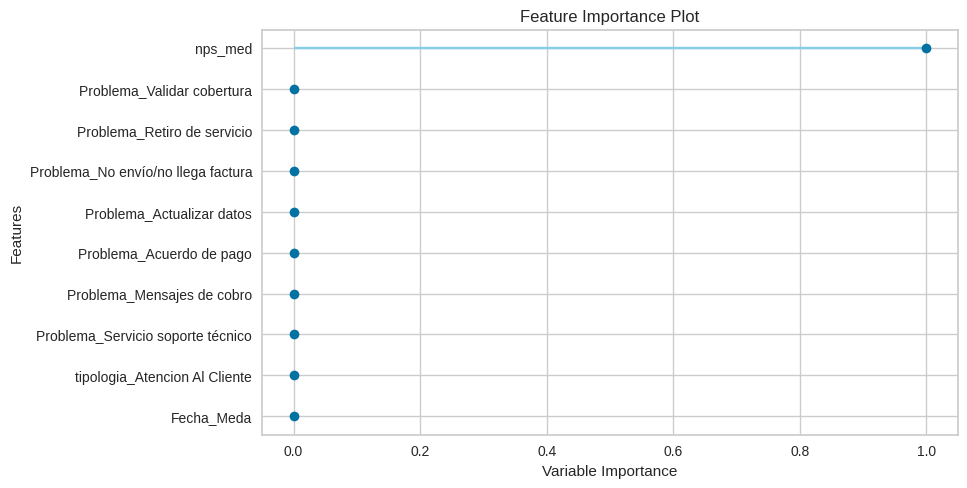

In [ ]:
print(best)
plot_model(best, plot = 'feature')

In [ ]:
# Tunear el mejor model
tuned_model = tune_model(best)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# Usando Arboles de decision para predecir los datos de testeo
#predict_model(tuned_model)
predictions = predict_model(best,
                            data = X_train)
predictions.head(100)

Fecha_Meda    grupo_meda    nps_med fcr_cat  Esfuerzo  \
5080  2021-12-06  Whatsapp Hogar     5       Sí        8      
517   2022-03-27             NaN     6       No        7      
5788  2021-11-13  Whatsapp Hogar     0       No        0      
4460  2021-12-20  Whatsapp Hogar     1       Sí        9      
452   2022-03-05  Whatsapp Hogar    10       Sí       10      
...          ...             ...      ...     ...       ...   
6178  2021-12-23  Whatsapp Hogar     9       Sí        8      
4520  2021-10-16  Whatsapp Hogar     0       No        0      
1221  2021-11-01  Whatsapp Hogar     0       No        0      
4818  2022-01-23  Whatsapp Hogar    10       Sí        8      
1396  2021-10-15  Whatsapp Hogar     5       Sí        8      

      Satisfaccion_asesor  Satisfacción_general       Tipo_CES        \
5080         10.0                   5.0          Ni Fácil ni Difícil   
517           NaN                   3.0          Ni Fácil ni Difícil   
5788          0.0                   1.0                  Muy Difícil   
4460          7.0                   4.0                    Muy Fácil   
452          10.0                   5.0                    Muy Fácil   
...                   ...                   ...                  ...   
6178          9.0                   4.0          Ni Fácil ni Difícil   
4520          0.0                   1.0                  Muy Difícil   
1221          0.0                   1.0                  Muy Difícil   
4818          6.0                   4.0          Ni Fácil ni Difícil   
1396          9.0                   5.0          Ni Fácil ni Difícil   

            Tipo_SATU_asesor              Tipo_SATU_general         \
5080                     Satisfecho                 Muy Satisfecho   
517                             NaN  Ni Satisfecho Ni Insatisfecho   
5788                   Insatisfecho               Muy Insatisfecho   
4460                     Satisfecho                     Satisfecho   
452                      Satisfecho                 Muy Satisfecho   
...                             ...                            ...   
6178                     Satisfecho                     Satisfecho   
4520                   Insatisfecho               Muy Insatisfecho   
1221                   Insatisfecho               Muy Insatisfecho   
4818  Ni Satisfecho Ni Insatisfecho                     Satisfecho   
1396                     Satisfecho                 Muy Satisfecho   

     Ticket Status              Problema                    Necesidad         \
5080       NaN      Detalles y cambio en facturación        Dudas de factura   
517        NaN                    Fallas en servicio        Dudas de factura   
5788       NaN               Instalación de servicio     Información general   
4460       NaN                    Fallas en servicio         Acuerdo de pago   
452        NaN           Reconexiones y suspensiones        Dudas de factura   
...            ...                               ...                     ...   
6178       NaN                     Cancelar servicio  Traslado decodificador   
4520       NaN              Inconformidad con cobros       Ajuste de factura   
1221       NaN                     Cancelar servicio       Retiro definitivo   
4818       NaN           Reconexiones y suspensiones        Dudas de factura   
1396       NaN              Inconformidad con cobros       Ajuste de factura   

            tipologia          id   id_asesor  prediction_label  \
5080    Pagos/Reactivaciones  2737  Asesor_155    Detractores     
517        Internet Fijo HFC  6431   Asesor_13    Detractores     
5788       Instalacion Nueva  1817  Asesor_177    Detractores     
4460           Factura/Cobro  3473  Asesor_129    Detractores     
452     Pagos/Reactivaciones  5843   Asesor_10     Promotores     
...                      ...   ...         ...              ...   
6178    Pagos/Reactivaciones  3658  Asesor_196     Promotores     
4520           Factura/Cobro   793  Asesor_131

### XGBoost


In [ ]:
# Predictores (X), objetivo (y)
X = encuesta_indicadores_df.drop(["Tipo_NPS"], axis = 1)
y =  encuesta_indicadores_df.loc[:, "Tipo_NPS"]

# Train test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 123)

In [ ]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
le.classes_

array(['Detractores', 'Neutros', 'Promotores'], dtype=object)

In [ ]:
y_train = pd.DataFrame(y_train_encoded, columns = ["Tipo_NPS"] )
y_train.head()

Tipo_NPS
0      0   
1      0   
2      0   
3      0   
4      2

In [ ]:
xg_cl = xgb.XGBClassifier(n_estimators = 10, seed = 123)

In [ ]:
xg_cl.fit(X_train, y_train)

ValueError: ignored